# Telecom churn case study

#### Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
Goal is to reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

#### Definitions of Churn
There are various ways to define churn, such as:
- Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time.
- Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

In [1]:

# Load libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

from scipy.stats import norm
from scipy import stats
import datetime as dt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

import sklearn
from sklearn import metrics

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Load Data

In [2]:
#read data
data = pd.read_csv("telecom_churn_data.csv", sep=',',encoding = "ISO-8859-1")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [3]:
#check first few data records
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# Transposed data view
data.head().T
# Mobile number seems to be uniqe customer identifier 

,0,1,2,3,4
mobile_number,7000842753,7001865778,7001625959,7001204172,7000142493
circle_id,109,109,109,109,109
loc_og_t2o_mou,0,0,0,0,0
std_og_t2o_mou,0,0,0,0,0
loc_ic_t2o_mou,0,0,0,0,0
last_date_of_month_6,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014
last_date_of_month_7,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014
last_date_of_month_8,8/31/2014,8/31/2014,8/31/2014,8/31/2014,8/31/2014
last_date_of_month_9,9/30/2014,9/30/2014,9/30/2014,9/30/2014,9/30/2014
arpu_6,197.385,34.047,167.69,221.338,261.636


In [5]:
data.shape

(99999, 226)

In [6]:
# lets see the missing values in % for each feature
round(100*(data.isnull().sum()/len(data.index)), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [7]:
#list of columns
pd.DataFrame(data.columns)

,0
0,mobile_number
1,circle_id
2,loc_og_t2o_mou
3,std_og_t2o_mou
4,loc_ic_t2o_mou
5,last_date_of_month_6
6,last_date_of_month_7
7,last_date_of_month_8
8,last_date_of_month_9
9,arpu_6


In [8]:
print ("The cutomer-level information is represented by %d columns"% (data.shape[1]))
# getting the unique number of custormers from the data
print ("Unique customers(Mobile Numbers): %d"%len(data.mobile_number.unique()))

The cutomer-level information is represented by 226 columns
Unique customers(Mobile Numbers): 99999


### Data Preparation

In [9]:
#Function to return the columns name which has more than input % provided as compared to complete data set
def getMissingperc(perc):
    missing = round(100*(data.isnull().sum()/data.shape[0]))
    print("There are {} columns which has more than {}% missing records".format(len(missing.loc[missing > perc]),perc))
    return missing.loc[missing > perc]

In [10]:
#lets check the colums which has more than 70% missing values
getMissingperc(70)

There are 40 columns which has more than 70% missing records


date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_6           75.0
total_rech_data_7           74.0
total_rech_data_8           74.0
total_rech_data_9           74.0
max_rech_data_6             75.0
max_rech_data_7             74.0
max_rech_data_8             74.0
max_rech_data_9             74.0
count_rech_2g_6             75.0
count_rech_2g_7             74.0
count_rech_2g_8             74.0
count_rech_2g_9             74.0
count_rech_3g_6             75.0
count_rech_3g_7             74.0
count_rech_3g_8             74.0
count_rech_3g_9             74.0
av_rech_amt_data_6          75.0
av_rech_amt_data_7          74.0
av_rech_amt_data_8          74.0
av_rech_amt_data_9          74.0
arpu_3g_6                   75.0
arpu_3g_7                   74.0
arpu_3g_8                   74.0
arpu_3g_9                   74.0
arpu_2g_6                   75.0
arpu_2g_7                   74.0
arpu_2g_8 

Out of the above highlighted 40 coumns, many are required and important for our analysis. So they cannot be juts dropped. We can impute 0 in missing records.

In [11]:
# create a list of colums which needs to be imputed with zero
zero_impute = ['max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9', 
               'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9',
               'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9',
               'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9',
               'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
               'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9',
               'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
               'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
               'fb_user_6','fb_user_7','fb_user_8','fb_user_9']

In [12]:
# impute missing values with 0
data[zero_impute] = data[zero_impute].apply(lambda x: x.fillna(0))

In [13]:
# Check if the values are imputed correctly 
getMissingperc(70)
# yes, now we just have 4 columns which has more than 70% missing value

There are 4 columns which has more than 70% missing records


date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
dtype: float64

In [14]:
# now, let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(data[zero_impute].isnull().sum()*100/data.shape[1])

# summary
print("\nSummary statistics\n")
print(data[zero_impute].describe(include='all'))

Missing value ratio:

max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
arpu_3g_6             0.0
arpu_3g_7             0.0
arpu_3g_8             0.0
arpu_3g_9             0.0
arpu_2g_6             0.0
arpu_2g_7             0.0
arpu_2g_8             0.0
arpu_2g_9             0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_2g_9       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
count_rech_3g_8       0.0
count_rech_3g_9       0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
night_pck_user_6      0.0
night_pck_user_7      0.0
night_pck_user_8      0.0
night_pck_user_9      0.0
fb_user_6             0.0
fb_user_7             0.0
fb_user_8             0.0
fb_user_9             0.0
dtype: float64

Summary statistics

      

In [15]:
# Lets drop columns which has more that 70% missing data
col = list(getMissingperc(70).index)
data.drop(col,axis=1,inplace=True)
data.shape

There are 4 columns which has more than 70% missing records


(99999, 222)

In [16]:
# Lets check the colums which has more than 5% missing values 
getMissingperc(5)

There are 29 columns which has more than 5% missing records


onnet_mou_9         8.0
offnet_mou_9        8.0
roam_ic_mou_9       8.0
roam_og_mou_9       8.0
loc_og_t2t_mou_9    8.0
loc_og_t2m_mou_9    8.0
loc_og_t2f_mou_9    8.0
loc_og_t2c_mou_9    8.0
loc_og_mou_9        8.0
std_og_t2t_mou_9    8.0
std_og_t2m_mou_9    8.0
std_og_t2f_mou_9    8.0
std_og_t2c_mou_9    8.0
std_og_mou_9        8.0
isd_og_mou_9        8.0
spl_og_mou_9        8.0
og_others_9         8.0
loc_ic_t2t_mou_9    8.0
loc_ic_t2m_mou_9    8.0
loc_ic_t2f_mou_9    8.0
loc_ic_mou_9        8.0
std_ic_t2t_mou_9    8.0
std_ic_t2m_mou_9    8.0
std_ic_t2f_mou_9    8.0
std_ic_t2o_mou_9    8.0
std_ic_mou_9        8.0
spl_ic_mou_9        8.0
isd_ic_mou_9        8.0
ic_others_9         8.0
dtype: float64

It is observed that all the colums corresponding to 9th month has missing values more than 5%

In [17]:
# lest check the data for all the missing colums highlighted above
col = list(getMissingperc(5).index)
print(len(data[data[col].isnull().all(axis=1)]))

There are 29 columns which has more than 5% missing records
7745


In [18]:
data[data[col].isnull().all(axis=1)][col].head()

,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_t2c_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# there are 7745 customers which has all the data missing, lets impute it with 0
data[col] = data[col].apply(lambda x: x.fillna(0))

In [20]:
data=data[~data[col].isnull().all(axis=1)]
data.shape

(99999, 222)

In [21]:
# Lets check the colums which has more than 2% missing values 
getMissingperc(2)

There are 89 columns which has more than 2% missing records


onnet_mou_6            4.0
onnet_mou_7            4.0
onnet_mou_8            5.0
offnet_mou_6           4.0
offnet_mou_7           4.0
offnet_mou_8           5.0
roam_ic_mou_6          4.0
roam_ic_mou_7          4.0
roam_ic_mou_8          5.0
roam_og_mou_6          4.0
roam_og_mou_7          4.0
roam_og_mou_8          5.0
loc_og_t2t_mou_6       4.0
loc_og_t2t_mou_7       4.0
loc_og_t2t_mou_8       5.0
loc_og_t2m_mou_6       4.0
loc_og_t2m_mou_7       4.0
loc_og_t2m_mou_8       5.0
loc_og_t2f_mou_6       4.0
loc_og_t2f_mou_7       4.0
loc_og_t2f_mou_8       5.0
loc_og_t2c_mou_6       4.0
loc_og_t2c_mou_7       4.0
loc_og_t2c_mou_8       5.0
loc_og_mou_6           4.0
loc_og_mou_7           4.0
loc_og_mou_8           5.0
std_og_t2t_mou_6       4.0
std_og_t2t_mou_7       4.0
std_og_t2t_mou_8       5.0
std_og_t2m_mou_6       4.0
std_og_t2m_mou_7       4.0
std_og_t2m_mou_8       5.0
std_og_t2f_mou_6       4.0
std_og_t2f_mou_7       4.0
std_og_t2f_mou_8       5.0
std_og_t2c_mou_6       4.0
s

In [22]:
# lest check the data for all the missing colums highlighted above
col = list(getMissingperc(2).index)
print(len(data[data[col].isnull().all(axis=1)]))

There are 89 columns which has more than 2% missing records
381


In [23]:
# there are 381 customers which has missing values, since count is low we can safely delete those records
data=data[~data[col].isnull().all(axis=1)]
data.shape

(99618, 222)

In [24]:
# for remaining customers, missing data is spread. lets put 0 for remaining records
col.remove('date_of_last_rech_8')
col.remove('date_of_last_rech_9')


In [25]:
data[col] = data[col].apply(lambda x: x.fillna(0))

In [26]:
# Lets check the colums which has more than 0% missing values 
getMissingperc(0)

There are 9 columns which has more than 0% missing records


loc_og_t2o_mou          1.0
std_og_t2o_mou          1.0
loc_ic_t2o_mou          1.0
last_date_of_month_8    1.0
last_date_of_month_9    1.0
date_of_last_rech_6     1.0
date_of_last_rech_7     1.0
date_of_last_rech_8     3.0
date_of_last_rech_9     4.0
dtype: float64

In [27]:
# letes check unique values for each of the colums highlighted above
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
for i in col: 
    print("Unique values in column %s are %s" % (i,data[i].unique()))

Unique values in column loc_og_t2o_mou are [ 0. nan]
Unique values in column std_og_t2o_mou are [ 0. nan]
Unique values in column loc_ic_t2o_mou are [ 0. nan]
Unique values in column last_date_of_month_7 are ['7/31/2014' nan]
Unique values in column last_date_of_month_8 are ['8/31/2014' nan]
Unique values in column last_date_of_month_9 are ['9/30/2014' nan]
Unique values in column date_of_last_rech_7 are ['7/16/2014' '7/31/2014' '7/24/2014' '7/28/2014' '7/17/2014' '7/25/2014'
 '7/23/2014' '7/5/2014' '7/10/2014' '7/22/2014' '7/30/2014' '7/3/2014'
 '7/7/2014' '7/29/2014' '7/27/2014' '7/19/2014' '7/14/2014' '7/20/2014'
 '7/4/2014' '7/12/2014' nan '7/26/2014' '7/11/2014' '7/6/2014' '7/21/2014'
 '7/13/2014' '7/15/2014' '7/18/2014' '7/9/2014' '7/2/2014' '7/8/2014'
 '7/1/2014']
Unique values in column date_of_last_rech_8 are ['8/8/2014' '8/28/2014' '8/14/2014' '8/31/2014' '8/9/2014' '8/24/2014'
 '8/26/2014' '8/30/2014' '8/29/2014' '8/27/2014' '8/21/2014' '8/10/2014'
 '8/25/2014' '8/19/2014' '

In [28]:
# features loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou,last_date_of_month_7, last_date_of_month_8,
# last_date_of_month_9 has just one unique value. 
# we can impute them with their modes
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']
for c in col:
    print(data[c].value_counts())
    data[c].fillna(data[c].mode()[0], inplace=True)

0.0    98981
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
Name: std_og_t2o_mou, dtype: int64
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
7/31/2014    99300
Name: last_date_of_month_7, dtype: int64
8/31/2014    98867
Name: last_date_of_month_8, dtype: int64
9/30/2014    98321
Name: last_date_of_month_9, dtype: int64


In [29]:
# Lets again check the colums which has more than 0% missing values 
getMissingperc(0)

There are 4 columns which has more than 0% missing records


date_of_last_rech_6    1.0
date_of_last_rech_7    1.0
date_of_last_rech_8    3.0
date_of_last_rech_9    4.0
dtype: float64

In [30]:
# All the cloumns are related to date
# lets see how many records have blank values, it will not be more than 5%
col = list(getMissingperc(0).index)
print ("There are %d rows in total having missing values for these variables."%(len(data[data[col].isnull().all(axis=1)])))

There are 4 columns which has more than 0% missing records
There are 22 rows in total having missing values for these variables.


In [31]:
# all the dates field can be imputed with the last day of month
data[data['date_of_last_rech_6'].isnull()]['date_of_last_rech_6'] = '6/30/2014'
data[data['date_of_last_rech_7'].isnull()]['date_of_last_rech_7'] = '7/31/2014'
data[data['date_of_last_rech_8'].isnull()]['date_of_last_rech_8'] = '8/31/2014'
data[data['date_of_last_rech_9'].isnull()]['date_of_last_rech_9'] = '9/30/2014'

In [32]:
# lets check for all the columns which has all zeros
zero_columns=data.columns[(data == 0).all()]

In [33]:
print(zero_columns)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')


In [34]:
# There are 11 columns which just has zeros. We can drop such columns without loosing any information
data.drop(zero_columns,axis=1,inplace=True)

In [35]:
# lets check the shape of data frame
data.shape

(99618, 211)

In [36]:
# Check for categorical variables which have <4 outcomes
cat_df = pd.DataFrame(data.nunique()).reset_index()
cat_df.columns=['Cols','uniques']
cat_df[cat_df['uniques']<=4]

,Cols,uniques
1,circle_id,1
2,last_date_of_month_6,1
3,last_date_of_month_7,1
4,last_date_of_month_8,1
5,last_date_of_month_9,1
182,night_pck_user_6,2
183,night_pck_user_7,2
184,night_pck_user_8,2
185,night_pck_user_9,2
202,fb_user_6,2


In [37]:
def one_val_count(df,x):
    for i in x:
        print("Null counts for: ",i," ",df[i].isnull().sum())
        print("Val counts for: ",i," ",df[i].value_counts())

In [38]:
#Checking cols with only 1 value in them. These are not useful in any analysis since they wont explain
# any variance in data while building the model. These can be dropped directly.
# one_val_cols = cat_df[cat_df['uniques']==1]['Cols']
one_val_cols = list(cat_df[cat_df['uniques']==1]['Cols'])
one_val_cols
print("Total rows: ", data.shape)
one_val_count(data,one_val_cols)

Total rows:  (99618, 211)
Null counts for:  circle_id   0
Val counts for:  circle_id   109    99618
Name: circle_id, dtype: int64
Null counts for:  last_date_of_month_6   0
Val counts for:  last_date_of_month_6   6/30/2014    99618
Name: last_date_of_month_6, dtype: int64
Null counts for:  last_date_of_month_7   0
Val counts for:  last_date_of_month_7   7/31/2014    99618
Name: last_date_of_month_7, dtype: int64
Null counts for:  last_date_of_month_8   0
Val counts for:  last_date_of_month_8   8/31/2014    99618
Name: last_date_of_month_8, dtype: int64
Null counts for:  last_date_of_month_9   0
Val counts for:  last_date_of_month_9   9/30/2014    99618
Name: last_date_of_month_9, dtype: int64


In [39]:
# Lets drop the colums which just have single value as they will not add any value to data analysis
data.drop(one_val_cols, axis=1, inplace=True)
data.shape

(99618, 206)

#### Filtering high value customers

In [40]:
# Derive new feature for total data amounts
data['total_data_amt_6'] = data['total_rech_data_6'] * data['av_rech_amt_data_6']
data['total_data_amt_7'] = data['total_rech_data_7'] * data['av_rech_amt_data_7']
data['total_data_amt_8'] = data['total_rech_data_8'] * data['av_rech_amt_data_8']

In [41]:
#Dropping total_rech_data_X and av_rech_amt_data_X
data.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9'
         ,'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']
       , axis=1, inplace=True)
data.shape

(99618, 201)

In [42]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
data['amt_data_6'] = data["total_rech_amt_6"] + data['total_data_amt_6']
data['amt_data_7'] = data["total_rech_amt_7"] + data['total_data_amt_7']
data['amt_data_8'] = data["total_rech_amt_8"] + data['total_data_amt_8']

In [43]:
# Calculate average recharge amount for growth phase
data["avg_amt_data67"] = 0.5*(data["amt_data_6"] + data["amt_data_7"])

avg_goodPhase =(data.avg_amt_data67)
# finding the cutoff which is the 70th percentile of the good phase average recharge amounts
hv_cutoff= np.percentile(data["avg_amt_data67"], 70)
# Filtering the users whose good phase avg. recharge amount >= to the cutoff of 70th percentile.
hv_users = data[avg_goodPhase >=  hv_cutoff]
hv_users.reset_index(inplace=True,drop=True)
# Print 70th percentile data
print(np.percentile(data["avg_amt_data67"], 70))

479.5


Recharge amount at 70th percentile is 479.5

In [44]:
print("Number of High-Value Customer: %d\n"% len(hv_users))
print("Percentage High-value users : {}%".format(round(len(hv_users)/data.shape[0]*100),2))

Number of High-Value Customer: 29906

Percentage High-value users : 30%


In [45]:
# Filter high value customers
data = data[data["avg_amt_data67"] >= np.percentile(data["avg_amt_data67"], 70)]

In [46]:
data.shape

(29906, 205)

### Tag Churners and Non churners
Lets tag churned customers (churn=1, else 0) based on the fourth month as follows: Customers who have not made any calls (incoming or outgoing) and those who have not used mobile internet even once in the churn phase. 
Features that can be used to tag churners are: total_ic_mou_9 total_og_mou_9 vol_2g_mb_9 vol_3g_mb_9. Once this is done, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their heading).

In [47]:
# Check columns for null values
churn_rep_cols = ["total_ic_mou_9", "total_og_mou_9", "vol_2g_mb_9", "vol_3g_mb_9"]
data[churn_rep_cols].isnull().any()

total_ic_mou_9    False
total_og_mou_9    False
vol_2g_mb_9       False
vol_3g_mb_9       False
dtype: bool

In [48]:
# Tag Churners: 1 - Churn and 0 - Not Churn
data["churn"] = data.apply(lambda row: 1 if ((row.total_ic_mou_9 + row.total_og_mou_9 + row.vol_2g_mb_9
                                                             + row.vol_3g_mb_9) == 0) else 0, axis=1)

In [49]:
# Check percenatge of churned customers
print("High-value Churn Percentage : {}%".format(round(100*data.churn.sum()/len(data),2)))

High-value Churn Percentage : 8.09%


There are only 8.09% of churn cases. This is classified as higly imbalanced data

In [50]:
# Delete all columns relating to 9th month(churn phase)
col =  data.columns[data.columns.str.contains('_9')]
data = data.drop(col, axis=1)

In [51]:
data.shape

(29906, 158)

### EDA

In [52]:
#Checking to see if all last recharge dates are NaN for the same entry
last_rech_date = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
display(data[data['date_of_last_rech_6'].isnull()][last_rech_date])
data[data['date_of_last_rech_6'].isnull()][last_rech_date].isnull().sum(axis=1)==3

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
91,NaN,7/27/2014,8/27/2014
414,NaN,7/28/2014,8/30/2014
6319,NaN,7/24/2014,8/28/2014
8125,NaN,7/31/2014,8/31/2014
8975,NaN,7/30/2014,8/23/2014
9917,NaN,7/31/2014,8/31/2014
9944,NaN,7/19/2014,8/24/2014
10191,NaN,7/29/2014,8/26/2014
10863,NaN,7/30/2014,8/29/2014
12987,NaN,7/31/2014,8/30/2014


91       False
414      False
6319     False
8125     False
8975     False
9917     False
9944     False
10191    False
10863    False
12987    False
13012    False
13837    False
14441    False
15648    False
20729    False
23795    False
23941    False
25733    False
26016    False
27471    False
28529    False
30674    False
31419    False
32545    False
33078    False
33604    False
34754    False
34833    False
36907    False
37928    False
38204    False
38878    False
39217    False
40172    False
42215    False
42497    False
47642    False
49263    False
50219    False
51932    False
52803    False
53219    False
59096    False
60201    False
60994    False
62905    False
63381    False
66365    False
70648    False
70743    False
71494    False
71518    False
72478    False
74609    False
75803    False
77947    False
78137    False
78674    False
78929    False
80393    False
81691    False
81949    False
88164    False
91250    False
93119    False
95854    False
96676    F

In [53]:
print("Before:")
display(data[last_rech_date].info())
for col in last_rech_date:
    data[col] = pd.to_datetime(data[col])
print("After:")
display(data[last_rech_date].info())

Before:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29906 entries, 0 to 99997
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date_of_last_rech_6  29833 non-null  object
 1   date_of_last_rech_7  29815 non-null  object
 2   date_of_last_rech_8  29338 non-null  object
dtypes: object(3)
memory usage: 934.6+ KB


None

After:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29906 entries, 0 to 99997
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_of_last_rech_6  29833 non-null  datetime64[ns]
 1   date_of_last_rech_7  29815 non-null  datetime64[ns]
 2   date_of_last_rech_8  29338 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 934.6 KB


None

(array([-25.,   0.,  25.,  50.,  75.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

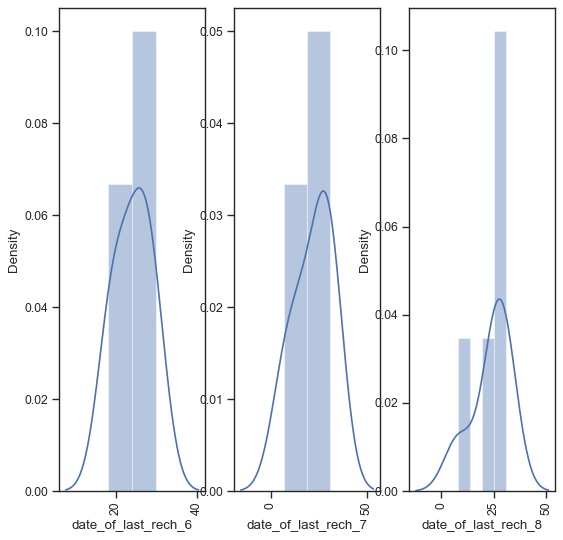

In [54]:
data[last_rech_date].describe()
plt.figure(figsize=(8,8), edgecolor="k", dpi=80)
plt.subplot(1,3,1)
sns.distplot(data['date_of_last_rech_6'].apply(lambda x: x.day).head())
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.distplot(data['date_of_last_rech_7'].apply(lambda x: x.day).head())
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.distplot(data['date_of_last_rech_8'].apply(lambda x: x.day).head())
plt.xticks(rotation=90)

In [55]:
#Convert rech date col into categorical field indicating first half of the month (1-15th) or 2nd half(16th-end of month)
import datetime
date_mid_6 = datetime.datetime.strptime("15-06-2014", "%d-%m-%Y")
date_mid_7 = datetime.datetime.strptime("15-07-2014", "%d-%m-%Y")
date_mid_8 = datetime.datetime.strptime("15-08-2014", "%d-%m-%Y")

print(date_mid_6, date_mid_7, date_mid_8)

def populate_dt_range(dates, date_mid):
    if dates < date_mid:
        return 1
    else:
        return 0
    
data['month_beginning_end_6'] = data.apply(lambda x: populate_dt_range(x['date_of_last_rech_6'],date_mid_6), axis=1)
data['month_beginning_end_7'] = data.apply(lambda x: populate_dt_range(x['date_of_last_rech_7'],date_mid_7), axis=1)
data['month_beginning_end_8'] = data.apply(lambda x: populate_dt_range(x['date_of_last_rech_8'],date_mid_8), axis=1)
data.head()

#df_highvalue['time_of_month_6'] = df_highvalue.apply(lambda x: 0 if df_highvalue['date_of_last_rech_6']<date_mid_6 else 1,axis=1)

2014-06-15 00:00:00 2014-07-15 00:00:00 2014-08-15 00:00:00


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_amt_6,total_data_amt_7,total_data_amt_8,amt_data_6,amt_data_7,amt_data_8,avg_amt_data67,churn,month_beginning_end_6,month_beginning_end_7,month_beginning_end_8
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,559.0,1,0,0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0,1,0,0,0
8,7001524846,378.721,492.223,137.362,413

In [56]:
#Drop date columns now
dt_drop_list=['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
print("Shape before: ",data.shape)
data.drop(dt_drop_list, axis=1, inplace=True)
print("Shape after: ",data.shape)

Shape before:  (29906, 161)
Shape after:  (29906, 158)


In [57]:
## Check class imbalance
df = data.copy(deep=True)

In [58]:
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_amt_6,total_data_amt_7,total_data_amt_8,amt_data_6,amt_data_7,amt_data_8,avg_amt_data67,churn,month_beginning_end_6,month_beginning_end_7,month_beginning_end_8
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,559.0,1,0,0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0,1,0,0,0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0

In [59]:
x = df['churn'].value_counts()
display(x)
round(df['churn'].value_counts()/sum(x)*100,2)

0    27488
1     2418
Name: churn, dtype: int64

0    91.91
1     8.09
Name: churn, dtype: float64

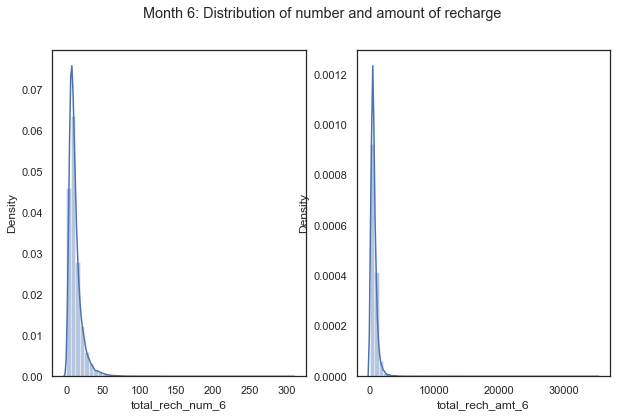

In [60]:
sns.set(style="white")
s = plt.figure(figsize=(10, 6))
s.suptitle("Month 6: Distribution of number and amount of recharge")
plt.subplot(1,2,1)
sns.distplot(df['total_rech_num_6'])
plt.subplot(1,2,2)
sns.distplot(df['total_rech_amt_6'])
plt.show()

<AxesSubplot:xlabel='total_rech_amt_7', ylabel='Density'>

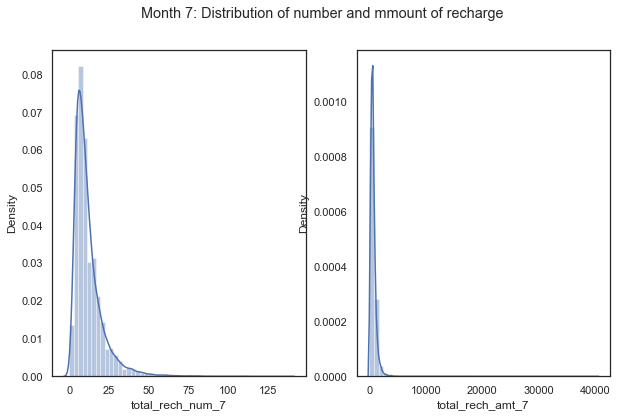

In [61]:
sns.set(style="white")
s=plt.figure(figsize=(10, 6))
s.suptitle("Month 7: Distribution of number and mmount of recharge")
plt.subplot(1,2,1)
sns.distplot(df['total_rech_num_7'])
plt.subplot(1,2,2)
sns.distplot(df['total_rech_amt_7'])

<AxesSubplot:xlabel='total_rech_amt_8', ylabel='Density'>

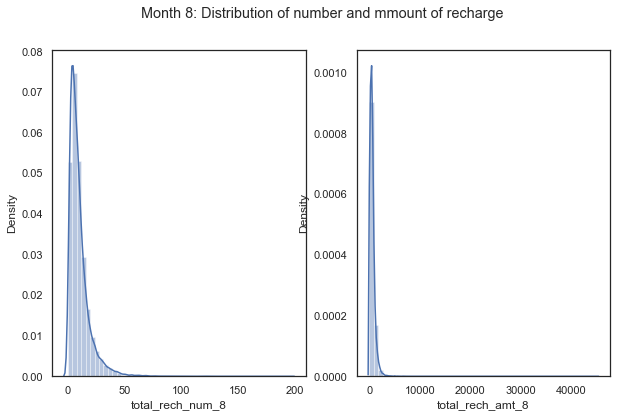

In [62]:
sns.set(style="white")
s=plt.figure(figsize=(10, 6))
s.suptitle("Month 8: Distribution of number and mmount of recharge")
plt.subplot(1,2,1)
sns.distplot(df['total_rech_num_8'])
plt.subplot(1,2,2)
sns.distplot(df['total_rech_amt_8'])

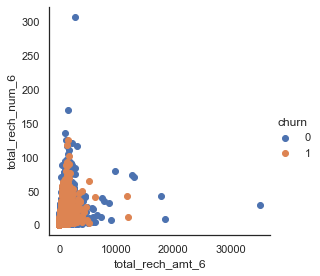

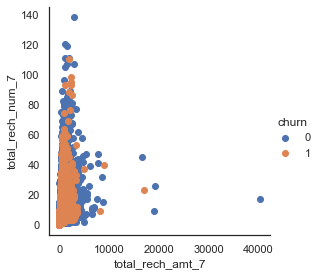

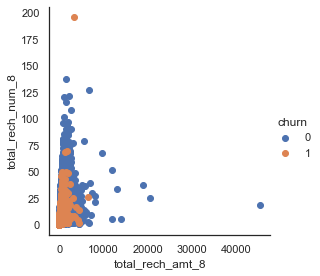

In [63]:
sns.FacetGrid(df,hue='churn',size=4).map(plt.scatter, "total_rech_amt_6","total_rech_num_6").add_legend()
sns.FacetGrid(df,hue='churn',size=4).map(plt.scatter, "total_rech_amt_7","total_rech_num_7").add_legend()
sns.FacetGrid(df,hue='churn',size=4).map(plt.scatter, "total_rech_amt_8","total_rech_num_8").add_legend()

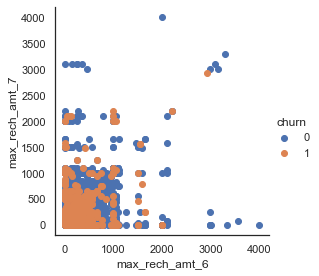

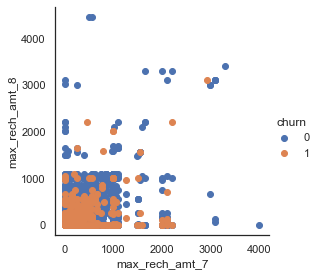

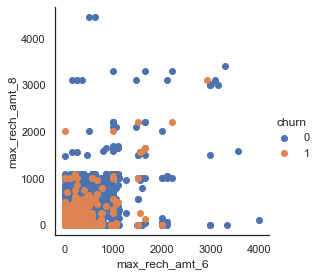

In [64]:
sns.FacetGrid(df,hue='churn',size=4).map(plt.scatter, "max_rech_amt_6","max_rech_amt_7").add_legend()
sns.FacetGrid(df,hue='churn',size=4).map(plt.scatter, "max_rech_amt_7","max_rech_amt_8").add_legend()
sns.FacetGrid(df,hue='churn',size=4).map(plt.scatter, "max_rech_amt_6","max_rech_amt_8").add_legend()

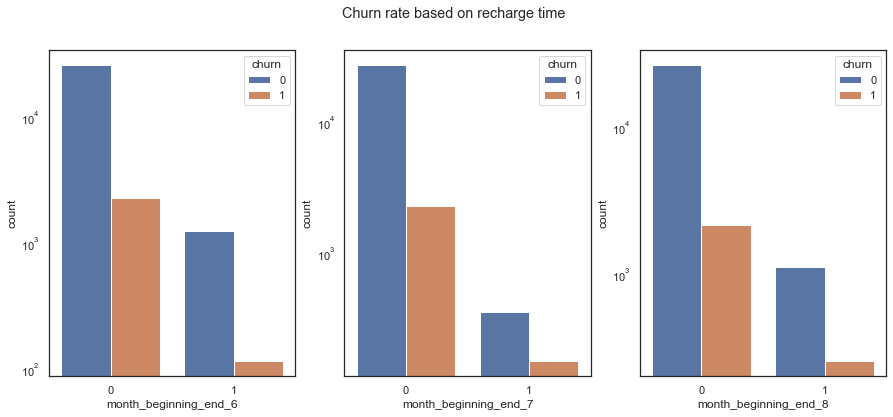

In [65]:

s=plt.figure(figsize=(15,6))
s.suptitle("Churn rate based on recharge time")
#1 -> First half of month, 0 -> Second half of month
plt.subplot(1,3,1)
sns.countplot('month_beginning_end_6',hue="churn", data=df)
plt.yscale('log')
plt.subplot(1,3,2)
sns.countplot('month_beginning_end_7',hue="churn", data=df)
plt.yscale('log')
plt.subplot(1,3,3)
sns.countplot('month_beginning_end_8',hue="churn", data=df)
plt.yscale('log')
plt.show()

### Derive delta features using action and growth phase months and droping columns from growth phase

In [66]:
#Combining columns from the "good" phase months i.e. _6 and _7
col_list = df.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()
#Combining the good months for average
l=['night_6_1', 'night_7_1', 'fb_6_1', 'fb_7_1']
for i, col in enumerate(col_list.unique()):
    print(col)
    if col not in l:
        avg_col_name = "goodmonths_"+col
        col_6 = col+"_6"
        col_7 = col+"_7"
        df[avg_col_name] = (df[col_6]  + df[col_7]) / 2

arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
loc_og_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
std_og_mou
isd_og_mou
spl_og_mou
og_others
total_og_mou
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
loc_ic_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
std_ic_mou
total_ic_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
max_rech_data
count_rech_2g
count_rech_3g
vol_2g_mb
vol_3g_mb
arpu_3g
arpu_2g
night_pck_user
monthly_2g
sachet_2g
monthly_3g
sachet_3g
fb_user
total_data_amt
amt_data
month_beginning_end


In [67]:
# Drop columns from growth phase
col_list = df.filter(regex='_6|_7').columns
for i, col in enumerate(col_list.unique()):
    if col not in l:
        df.drop(col, axis=1, inplace=True)
df.shape

(29906, 108)

In [68]:
col_list = df.filter(regex='_6|_7').columns
for i, col in enumerate(col_list.unique()):
    if col not in l:
        df.drop(col, axis=1, inplace=True)
df.shape

(29906, 108)

<AxesSubplot:>

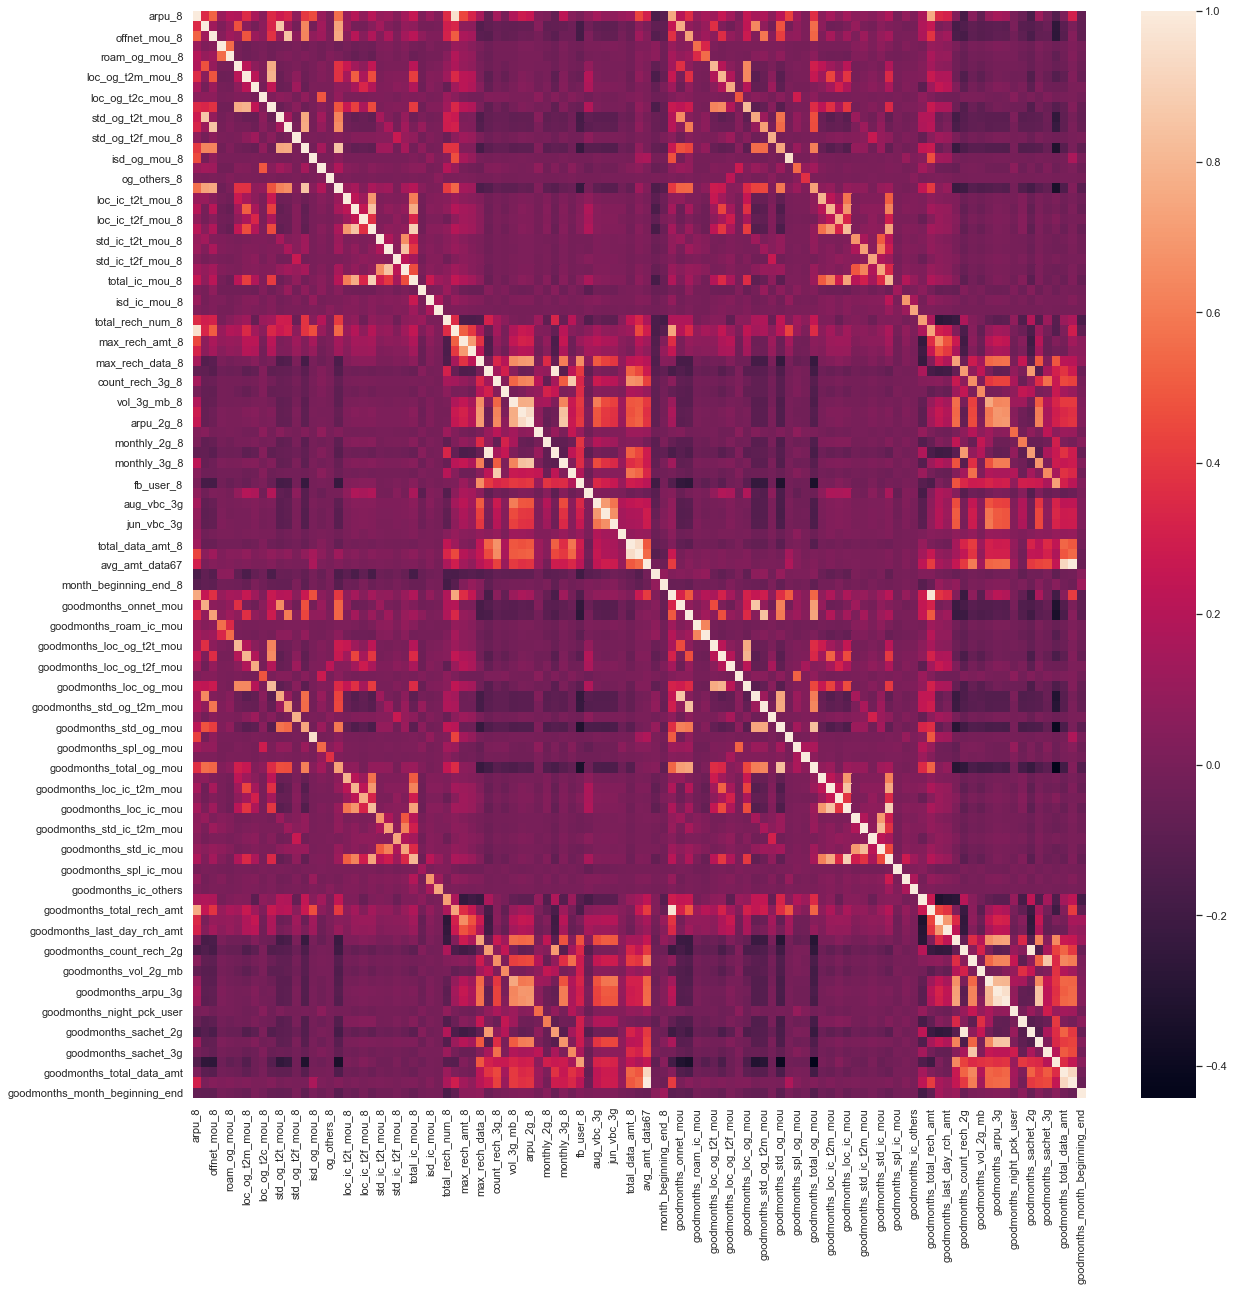

In [69]:
#Check heatmap for correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.drop('mobile_number',axis=1).corr())

Fom above heat map, we can see lots of corelation between variables

In [70]:
#Breaking down age on network to months from current record in days
df['mon'] = df['aon']/30
df.drop('aon', axis=1, inplace=True)
df['mon'].head()

0     32.266667
7     26.733333
8     10.500000
21    24.000000
23    20.133333
Name: mon, dtype: float64

In [71]:
def years(x):
    if x<=12:
        return "<1"
    elif x<=24 and x>12:
        return "1-2"
    elif x<=60 and x>24:
        return "2-5"
    else:
        return "5+"
    
df['years_with_company'] = df.apply(lambda x: years(x['mon']),axis=1)
df['years_with_company'].unique()

array(['2-5', '<1', '1-2', '5+'], dtype=object)

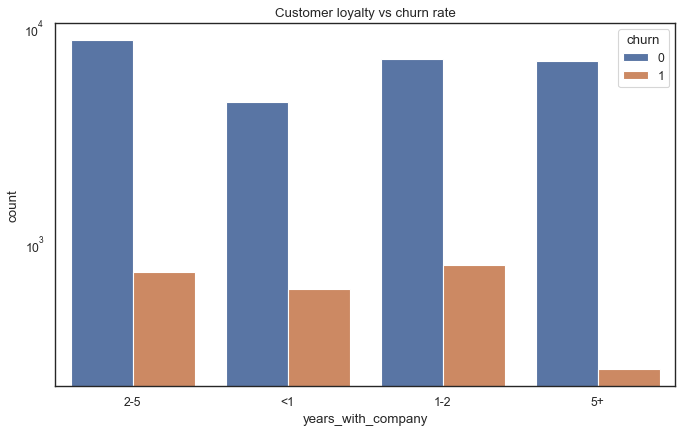

In [72]:
sns.set(style="white")
plt.figure(figsize=(10,6),edgecolor="k",facecolor="w",dpi=80)
sns.countplot(df['years_with_company'],hue=df["churn"])
plt.yscale("log")
plt.title("Customer loyalty vs churn rate")
plt.show()

We can see that the churn rate is high for customers with less than 2 years and low for customers more than 5 years

In [73]:
df.drop('years_with_company', axis=1, inplace=True)

## Modelling
### Lets start with Logistic Regression with RFE

In [74]:
df_lr = df.copy(deep=True)

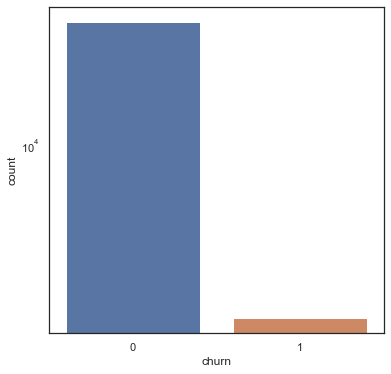

In [75]:
plt.figure(figsize=(6,6))
sns.countplot(x='churn', data=df_lr)
plt.yscale('log')
plt.show()

In [76]:
df_lr.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_amt_8,amt_data_8,avg_amt_data67,churn,month_beginning_end_8,goodmonths_arpu,goodmonths_onnet_mou,goodmonths_offnet_mou,goodmonths_roam_ic_mou,goodmonths_roam_og_mou,goodmonths_loc_og_t2t_mou,goodmonths_loc_og_t2m_mou,goodmonths_loc_og_t2f_mou,goodmonths_loc_og_t2c_mou,goodmonths_loc_og_mou,goodmonths_std_og_t2t_mou,goodmonths_std_og_t2m_mou,goodmonths_std_og_t2f_mou,goodmonths_std_og_mou,goodmonths_isd_og_mou,goodmonths_spl_og_mou,goodmonths_og_others,goodmonths_total_og_mou,goodmonths_loc_ic_t2t_mou,goodmonths_loc_ic_t2m_mou,goodmonths_loc_ic_t2f_mou,goodmonths_loc_ic_mou,goodmonths_std_ic_t2t_mou,goodmonths_std_ic_t2m_mou,goodmonths_std_ic_t2f_mou,goodmonths_std_ic_mou,goodmonths_total_ic_mou,goodmonths_spl_ic_mou,goodmonths_isd_ic_mou,goodmonths_ic_others,goodmonths_total_rech_num,goodmonths_total_rech_amt,goodmonths_max_rech_amt,goodmonths_last_day_rch_amt,goodmonths_max_rech_data,goodmonths_count_rech_2g,goodmonths_count_rech_3g,goodmonths_vol_2g_mb,goodmonths_vol_3g_mb,goodmonths_arpu_3g,goodmonths_arpu_2g,goodmonths_night_pck_user,goodmonths_monthly_2g,goodmonths_sachet_2g,goodmonths_monthly_3g,goodmonths_sachet_3g,goodmonths_fb_user,goodmonths_total_data_amt,goodmonths_amt_data,goodmonths_month_beginning_end,mon
0,7000842753,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.0,0.00,0.00,2,252,252,252,252.0,0.0,1.0,5.75,109.61,212.17,212.17,0.0,0,0,1,0,1.0,30.40,0.00,101.20,3.58,252.0,504.0,559.0,1,1,206.1005,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.00,0.000,0.000,0.00,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.5,307.0,252.0,252.0,252.0,0.0,1.0,15.725,117.165,212.170,212.17,0.0,0.0,0.0,1.0,0.0,1.0,252.0,559.0,0.0,32.266667
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0,57.74,19.38,18.74,0.00,0.0,3638.0,1185.0,1,0,1209.5150,56.26,510.295,24.86,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.37,68.000,0.090,2.25,0.0,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1185.0,0.0,26.733333
8,7001524846,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,23.0,3.0,0.0,0.03,11.94,19.83,0.00,0.0,0,3,0,0,1.0,21.03,910.65,122.16,0.00,207.0,327.0,696.0,0,0,435.4720,382.36,87.645,0.00,0.000,257.360,75.770,0.000,0.0,333.135,124.995,11.865,0.00,136.870,0.000,0.00,0.0,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.000,13.545,66.175,0.000,0.000,0.000,20.0,519.0,122.0,25.0,77.0,1.0,0.0,178.000,375.475,0.000,0.00,0.0,0.5,0.5,0.0,0.0,0.5,177.0,696.0,0.0,10.500000
21,7002124215,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,50,0.0,0.0,0.0,0.00,

In [77]:
df_lr.drop(['mobile_number'], axis=1, inplace=True)

In [78]:
X = df_lr.drop(['churn'],axis=1)
y = df_lr['churn']

In [79]:
from sklearn.preprocessing import StandardScaler
scaler_lr = StandardScaler()
Xlr_scaled = scaler_lr.fit_transform(X)

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(Xlr_scaled, y, train_size=0.7, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20934, 106)
(8972, 106)
(20934,)
(8972,)


In [81]:
#Balancing the actual variable using oversampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100)
X_bal,y_bal = sm.fit_sample(X_train,y_train.ravel())

In [82]:
np.unique(y_bal,return_counts=True)

(array([0, 1], dtype=int64), array([19234, 19234], dtype=int64))

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [84]:
logreg = LogisticRegression()
rfe = RFE(logreg,20)
rfe.fit(X_bal,y_bal)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [85]:
rfe_features = df_lr.drop('churn', axis=1).columns[rfe.support_]
display(rfe_features)

Index(['onnet_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'isd_og_mou_8',
       'og_others_8', 'total_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'night_pck_user_8', 'monthly_2g_8',
       'fb_user_8', 'sep_vbc_3g', 'goodmonths_arpu', 'goodmonths_total_ic_mou',
       'mon'],
      dtype='object')

In [86]:
X_lr_rfe = pd.DataFrame(X_bal).iloc[:,rfe.support_]
X_lr_rfe.head()
X_lr_rfe.columns = rfe_features
X_lr_rfe.head()

,onnet_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,og_others_8,total_og_mou_8,loc_ic_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,vol_2g_mb_8,night_pck_user_8,monthly_2g_8,fb_user_8,sep_vbc_3g,goodmonths_arpu,goodmonths_total_ic_mou,mon
0,-0.412164,-0.375108,-0.037324,-0.043628,-0.017403,-0.648496,-0.584910,-0.141743,-0.587778,-0.240051,-1.075908,-0.636398,-0.338235,-0.107396,-0.377672,-0.955833,-0.153472,-0.246512,-0.582458,0.319575
1,1.138894,-0.239109,-0.145104,-0.043628,-0.017403,1.657556,0.764935,1.043300,1.021365,-0.240051,-0.105885,-0.636398,-0.338235,-0.107396,-0.377672,-0.955833,-0.153472,0.299443,1.058716,0.827239
2,-0.104414,-0.369830,-0.145104,-0.005889,-0.017403,-0.056415,0.597326,0.049502,0.533989,-0.240051,0.001896,0.258197,-0.332200,-0.107396,-0.377672,1.046208,-0.153472,0.365743,0.819653,-0.777229
3,4.462540,1.764393,-0.145104,-0.043628,-0.017403,3.483613,0.825751,-0.204076,0.592518,-0.240051,0.971919,-0.106523,-0.338235,-0.107396,-0.377672,-0.955833,-0.153472,1.168049,0.503735,-0.545334
4,-0.238243,0.096856,-0.145104,-0.043628,-0.017403,-0.303105,-0.511523,-0.158298,-0.531489,-0.240051,-0.752567,-0.429953,-0.338235,-0.107396,-0.377672,-0.955833,-0.153472,0.170035,-0.438753,-0.966297


In [87]:
y_rfe = y_bal

In [88]:
logreg_rfe = LogisticRegression(random_state=100)
logreg_rfe.fit(X_lr_rfe,y_rfe)

LogisticRegression(random_state=100)

In [89]:
X_test_rfe = pd.DataFrame(X_test).iloc[:,rfe.support_]
y_pred = logreg_rfe.predict(X_test_rfe)

In [90]:
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(logreg_rfe.score(X_test_rfe,y_test))
print(classification_report(y_test,y_pred))

[[6874 1380]
 [ 135  583]]
0.8311413285777975
0.8311413285777975
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8254
           1       0.30      0.81      0.43       718

    accuracy                           0.83      8972
   macro avg       0.64      0.82      0.67      8972
weighted avg       0.93      0.83      0.86      8972



### PCA

In [91]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [92]:
df_PCA = df.copy(deep=True)

In [93]:
df_PCA.drop('mobile_number', axis=1, inplace=True)

In [94]:
X=df_PCA.drop('churn', axis=1)
y=df_PCA['churn']

In [95]:
# Scaling variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=100)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20934, 106)
(8972, 106)
(20934,)
(8972,)


In [97]:
sm=SMOTE(random_state=100)
X_sm,y_sm=sm.fit_sample(X_train,y_train)
print(X_sm.shape)
print(y_sm.shape)

(38468, 106)
(38468,)


In [98]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [99]:
X_train_pca=pca.fit_transform(X_sm)
display(X_train_pca.shape)

X_test_pca = pca.transform(X_test)
display(X_test_pca.shape)

(38468, 106)

(8972, 106)

In [100]:
pca.components_

array([[-1.26735432e-04, -9.37273261e-02, -8.07548510e-02, ...,
         1.23251177e-01,  3.49072670e-02,  2.68082355e-02],
       [ 2.51068249e-01,  1.28487640e-01,  1.79062365e-01, ...,
         1.09099475e-01, -5.66172983e-02,  5.81454947e-02],
       [ 4.26546848e-02,  5.47983989e-02,  1.19348146e-02, ...,
         1.51492979e-01, -2.42695217e-02, -1.16358716e-01],
       ...,
       [ 0.00000000e+00, -6.36581932e-16, -1.37477657e-15, ...,
         1.19881838e-01, -5.59095065e-17,  9.94697856e-17],
       [-0.00000000e+00,  1.15931798e-16,  1.15867616e-16, ...,
        -5.65399390e-02, -7.26787027e-17, -2.13545472e-17],
       [ 0.00000000e+00,  1.68431654e-15,  1.62211390e-15, ...,
         6.97846917e-01,  7.16493177e-18,  1.48024627e-17]])

In [101]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.000127,0.251068,arpu_8
1,-0.093727,0.128488,onnet_mou_8
2,-0.080755,0.179062,offnet_mou_8
3,-0.019727,0.034340,roam_ic_mou_8
4,-0.036257,0.057345,roam_og_mou_8


In [102]:
pca.explained_variance_ratio_

array([1.13580671e-01, 1.07208418e-01, 6.59107250e-02, 5.52958721e-02,
       4.28730497e-02, 3.66402456e-02, 3.54059818e-02, 3.20825225e-02,
       2.95522540e-02, 2.28374968e-02, 2.06661799e-02, 1.96310759e-02,
       1.92323480e-02, 1.82031879e-02, 1.68011966e-02, 1.61837384e-02,
       1.55050902e-02, 1.49480512e-02, 1.44230195e-02, 1.37779969e-02,
       1.28068327e-02, 1.22068266e-02, 1.17054558e-02, 1.16137318e-02,
       1.07945494e-02, 1.01716226e-02, 9.87319229e-03, 9.59797786e-03,
       9.49985787e-03, 8.85675926e-03, 8.68432393e-03, 8.23934302e-03,
       7.83359265e-03, 7.58561115e-03, 7.35210679e-03, 7.15201394e-03,
       6.89954923e-03, 6.82790780e-03, 6.70136578e-03, 6.33751029e-03,
       6.21244683e-03, 6.11167963e-03, 5.89048442e-03, 5.68098365e-03,
       5.63574877e-03, 5.15050991e-03, 4.49570065e-03, 4.15157269e-03,
       3.71025073e-03, 3.52177797e-03, 3.44911644e-03, 3.40018740e-03,
       3.17083195e-03, 3.11402978e-03, 2.89569016e-03, 2.84185088e-03,
      

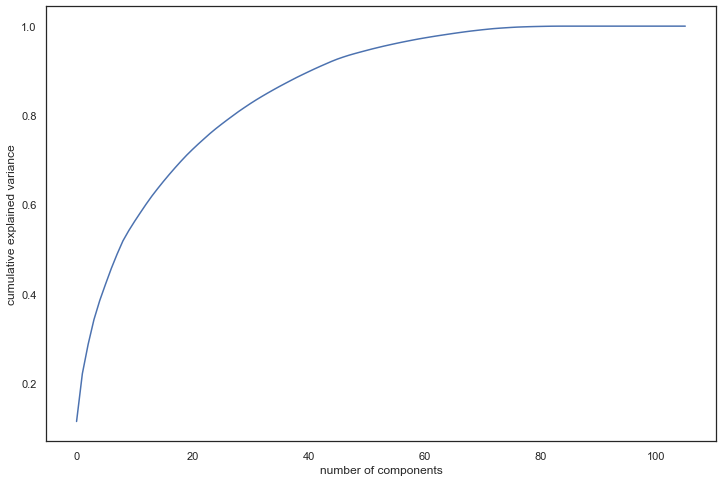

In [103]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

About 90% of variance is explained by 40 features

In [104]:
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:  [11.4 10.7  6.6  5.5  4.3  3.7  3.5  3.2  3.   2.3  2.1  2.   1.9  1.8
  1.7  1.6  1.6  1.5  1.4  1.4  1.3  1.2  1.2  1.2  1.1  1.   1.   1.
  0.9  0.9  0.9  0.8  0.8  0.8  0.7  0.7  0.7  0.7  0.7  0.6  0.6  0.6
  0.6  0.6  0.6  0.5  0.4  0.4  0.4  0.4  0.3  0.3  0.3  0.3  0.3  0.3
  0.3  0.3  0.3  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.1
  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0. ]


In [105]:
print (pca.explained_variance_ratio_.cumsum())

[0.11358067 0.22078909 0.28669981 0.34199569 0.38486874 0.42150898
 0.45691496 0.48899749 0.51854974 0.54138724 0.56205342 0.58168449
 0.60091684 0.61912003 0.63592123 0.65210496 0.66761005 0.6825581
 0.69698112 0.71075912 0.72356595 0.73577278 0.74747824 0.75909197
 0.76988652 0.78005814 0.78993133 0.79952931 0.80902917 0.81788593
 0.82657025 0.83480959 0.84264319 0.8502288  0.8575809  0.86473292
 0.87163247 0.87846038 0.88516174 0.89149925 0.8977117  0.90382338
 0.90971386 0.91539485 0.9210306  0.92618111 0.93067681 0.93482838
 0.93853863 0.94206041 0.94550952 0.94890971 0.95208054 0.95519457
 0.95809026 0.96093211 0.96367831 0.96628073 0.96881733 0.97128184
 0.97352309 0.97570297 0.97779665 0.97978109 0.98173939 0.98366844
 0.98549684 0.9872837  0.98895362 0.99044562 0.99190276 0.99324338
 0.99449845 0.99545987 0.9963295  0.99714971 0.99784267 0.9983283
 0.99875424 0.9991091  0.99939642 0.99966014 0.99987235 0.99996409
 0.99999668 0.99999934 1.         1.         1.         1.
 1.  

In [106]:
# Using incremental PCA for efficiency 
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=50)

In [107]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(20934, 50)

In [108]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

<AxesSubplot:>

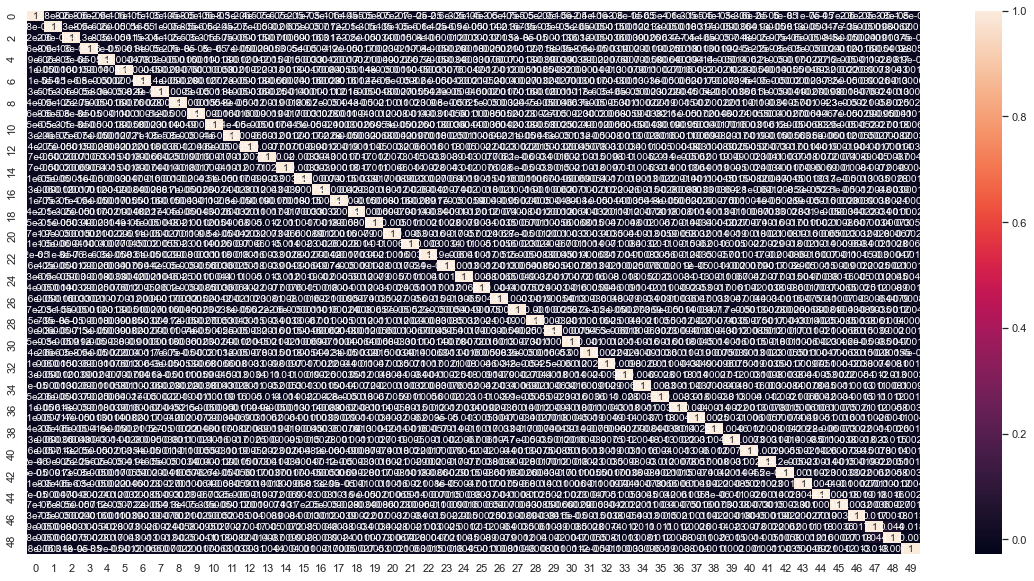

In [109]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [110]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.04386472843042234 , min corr:  -0.028263483451659913


In [111]:
#Applying selected components to the test data
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8972, 50)

### PCA on Logistics Regression

In [112]:
logreg = LogisticRegression()
logreg.fit(X_train_pca,y_sm)

LogisticRegression()

In [113]:
y_pred = logreg.predict(X_test_pca)

In [114]:
print(confusion_matrix(y_test,y_pred))

[[6887 1367]
 [ 134  584]]


In [115]:
print(accuracy_score(y_test,y_pred))

0.8327017387427552


In [116]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8254
           1       0.30      0.81      0.44       718

    accuracy                           0.83      8972
   macro avg       0.64      0.82      0.67      8972
weighted avg       0.93      0.83      0.86      8972



In [117]:
# Checking components of PCA and applying logreg again 
pca.components_

array([[-1.26735432e-04, -9.37273261e-02, -8.07548510e-02, ...,
         1.23251177e-01,  3.49072670e-02,  2.68082355e-02],
       [ 2.51068249e-01,  1.28487640e-01,  1.79062365e-01, ...,
         1.09099475e-01, -5.66172983e-02,  5.81454947e-02],
       [ 4.26546848e-02,  5.47983989e-02,  1.19348146e-02, ...,
         1.51492979e-01, -2.42695217e-02, -1.16358716e-01],
       ...,
       [ 0.00000000e+00, -6.36581932e-16, -1.37477657e-15, ...,
         1.19881838e-01, -5.59095065e-17,  9.94697856e-17],
       [-0.00000000e+00,  1.15931798e-16,  1.15867616e-16, ...,
        -5.65399390e-02, -7.26787027e-17, -2.13545472e-17],
       [ 0.00000000e+00,  1.68431654e-15,  1.62211390e-15, ...,
         6.97846917e-01,  7.16493177e-18,  1.48024627e-17]])

In [118]:
pcadf=pd.DataFrame({'Feature':list(X.columns),'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2]})
pcadf.head()

,Feature,PC1,PC2,PC3
0,arpu_8,-0.000127,0.251068,0.042655
1,onnet_mou_8,-0.093727,0.128488,0.054798
2,offnet_mou_8,-0.080755,0.179062,0.011935
3,roam_ic_mou_8,-0.019727,0.034340,0.041091
4,roam_og_mou_8,-0.036257,0.057345,0.076960


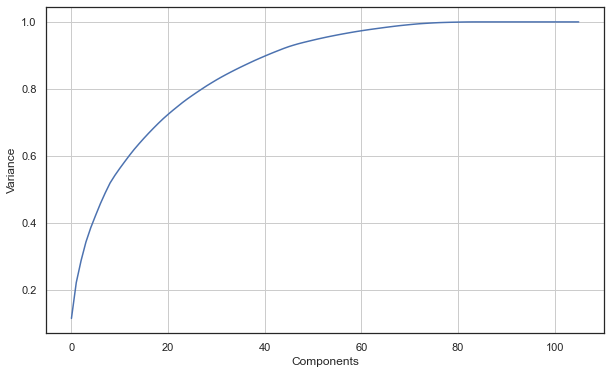

In [119]:
# Skree plot
f = plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Variance')
plt.grid(True)
plt.show()

About 90% variance is explained by around 40 features 

In [120]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 11.36,  22.08,  28.67,  34.2 ,  38.49,  42.15,  45.69,  48.9 ,
        51.86,  54.14,  56.21,  58.17,  60.09,  61.91,  63.59,  65.21,
        66.76,  68.25,  69.69,  71.07,  72.35,  73.57,  74.74,  75.9 ,
        76.98,  78.  ,  78.99,  79.95,  80.9 ,  81.79,  82.66,  83.48,
        84.26,  85.02,  85.76,  86.48,  87.17,  87.85,  88.52,  89.15,
        89.77,  90.38,  90.97,  91.54,  92.1 ,  92.62,  93.07,  93.49,
        93.86,  94.21,  94.55,  94.89,  95.21,  95.52,  95.81,  96.09,
        96.36,  96.62,  96.87,  97.12,  97.34,  97.56,  97.77,  97.97,
        98.17,  98.36,  98.54,  98.72,  98.89,  99.04,  99.19,  99.32,
        99.45,  99.55,  99.64,  99.72,  99.79,  99.84,  99.88,  99.92,
        99.95,  99.98, 100.  , 100.01, 100.01, 100.01, 100.01, 100.01,
       100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01,
       100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01,
       100.01, 100.01])

In [121]:
# lets try Logistics regression with 40 features 
pca_new = PCA(n_components=40)

In [122]:
X_train_pca_new = pca_new.fit_transform(X_sm)
X_test_pca_new = pca_new.transform(X_test)
print(X_train_pca_new.shape)
print(X_test_pca_new.shape)

(38468, 40)
(8972, 40)


In [123]:
logreg_new = LogisticRegression(C=1e9) ## Setting huge C param to avoid automatic regularization.
logreg_new.fit(X_train_pca_new,y_sm)
y_pred_new = logreg_new.predict(X_test_pca_new)

In [124]:
print(confusion_matrix(y_test,y_pred_new))

[[6836 1418]
 [ 132  586]]


In [125]:
print(accuracy_score(y_test,y_pred_new))

0.8272403031654034


In [126]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8254
           1       0.30      0.81      0.44       718

    accuracy                           0.83      8972
   macro avg       0.64      0.82      0.67      8972
weighted avg       0.93      0.83      0.86      8972



In [127]:
pca_column_frame = pcadf.head(40)

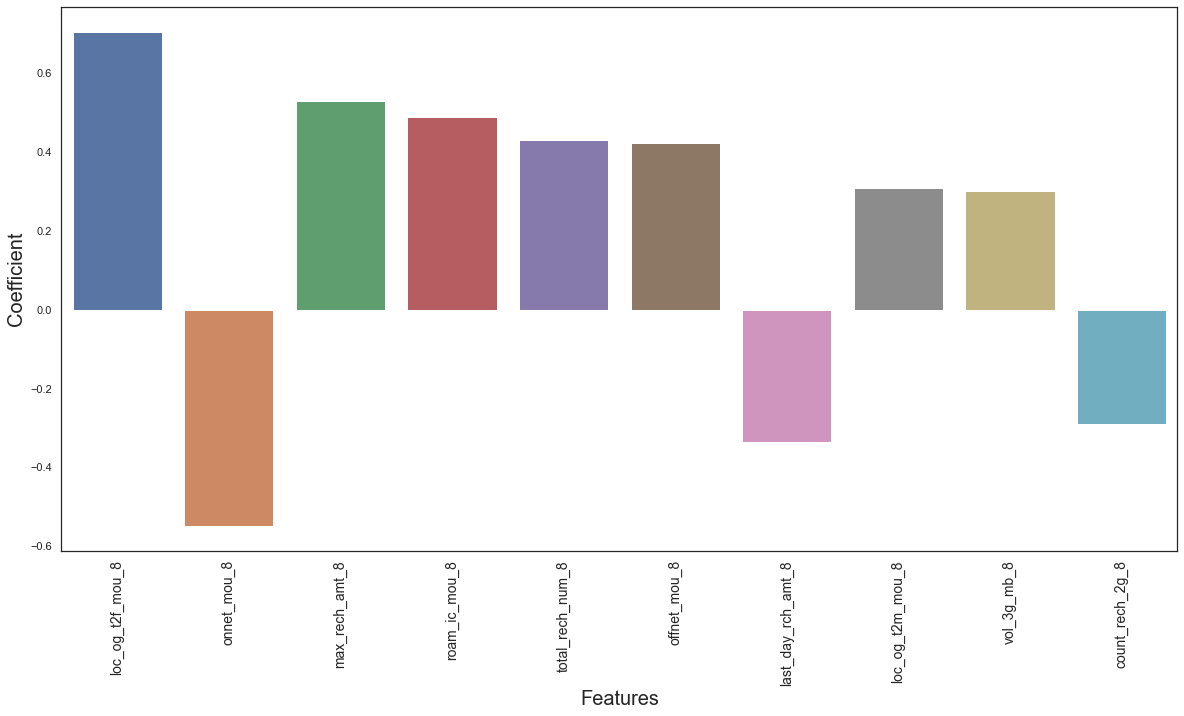

In [128]:
pca_column_frame['sampling_coeff'] = logreg_new.coef_[0]
plt.figure(figsize=(20, 10))
top_10_features = pca_column_frame.iloc[(-np.abs(pca_column_frame['sampling_coeff'].values)).argsort()].head(10)
sns.barplot(x='Feature', y='sampling_coeff', data=top_10_features)
plt.xlabel('Features', size=20)
plt.ylabel('Coefficient', size=20)
plt.xticks(size = 14, rotation='vertical')
plt.show()

### Random Forest

In [129]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()
rf1.fit(X_bal,y_bal)
rf1_y_pred = rf1.predict(X_test)

In [130]:
print(accuracy_score(y_test,rf1_y_pred))
print(confusion_matrix(y_test,rf1_y_pred))
print(classification_report(y_test,rf1_y_pred))

0.9339054837271511
[[7914  340]
 [ 253  465]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8254
           1       0.58      0.65      0.61       718

    accuracy                           0.93      8972
   macro avg       0.77      0.80      0.79      8972
weighted avg       0.94      0.93      0.94      8972



,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_amt_8,amt_data_8,avg_amt_data67,month_beginning_end_8,goodmonths_arpu,goodmonths_onnet_mou,goodmonths_offnet_mou,goodmonths_roam_ic_mou,goodmonths_roam_og_mou,goodmonths_loc_og_t2t_mou,goodmonths_loc_og_t2m_mou,goodmonths_loc_og_t2f_mou,goodmonths_loc_og_t2c_mou,goodmonths_loc_og_mou,goodmonths_std_og_t2t_mou,goodmonths_std_og_t2m_mou,goodmonths_std_og_t2f_mou,goodmonths_std_og_mou,goodmonths_isd_og_mou,goodmonths_spl_og_mou,goodmonths_og_others,goodmonths_total_og_mou,goodmonths_loc_ic_t2t_mou,goodmonths_loc_ic_t2m_mou,goodmonths_loc_ic_t2f_mou,goodmonths_loc_ic_mou,goodmonths_std_ic_t2t_mou,goodmonths_std_ic_t2m_mou,goodmonths_std_ic_t2f_mou,goodmonths_std_ic_mou,goodmonths_total_ic_mou,goodmonths_spl_ic_mou,goodmonths_isd_ic_mou,goodmonths_ic_others,goodmonths_total_rech_num,goodmonths_total_rech_amt,goodmonths_max_rech_amt,goodmonths_last_day_rch_amt,goodmonths_max_rech_data,goodmonths_count_rech_2g,goodmonths_count_rech_3g,goodmonths_vol_2g_mb,goodmonths_vol_3g_mb,goodmonths_arpu_3g,goodmonths_arpu_2g,goodmonths_night_pck_user,goodmonths_monthly_2g,goodmonths_sachet_2g,goodmonths_monthly_3g,goodmonths_sachet_3g,goodmonths_fb_user,goodmonths_total_data_amt,goodmonths_amt_data,goodmonths_month_beginning_end,mon
0,-0.242183,-0.412164,-0.583676,-0.005659,-0.176463,-0.285981,-0.446998,-0.301894,-0.238215,-0.482600,-0.292549,-0.375108,-0.037324,-0.443720,-0.043628,-0.322847,-0.017403,-0.648496,-0.274801,-0.568959,-0.333079,-0.584910,0.143065,-0.264382,-0.128873,-0.141743,-0.587778,-0.240051,-0.155995,-0.095878,-1.075908,-0.956539,-0.924739,-0.636398,-0.65588,-0.476380,-0.324031,-0.338235,-0.382781,-0.369311,-0.382983,-0.107396,-0.377672,-0.416197,-0.342176,-0.18389,-0.955833,-0.402063,-0.403645,-0.380691,-0.153472,-0.285642,-0.580767,-0.437111,-0.219780,-0.246512,-0.505852,-0.690326,0.209949,-0.079068,-0.324853,-0.570941,-0.304549,-0.267533,-0.589532,-0.383779,-0.415745,-0.109727,-0.536864,-0.047893,-0.373519,-0.142895,-0.818353,-0.263578,-0.630663,-0.340327,-0.621571,0.025383,-0.074519,0.018505,-0.035709,-0.582458,0.660444,-0.154828,-0.096735,-0.960319,-0.196565,2.132661,1.803820,-0.765486,-0.549706,-0.395913,-0.419735,-0.425599,-0.417092,-0.436292,-0.133604,-0.461235,-0.472643,-0.391547,-0.230575,-1.136365,-0.397707,-0.437111,-0.247868,0.319575
1,0.510551,1.138894,1.288523,-0.168790,-0.189908,0.210203,2.996780,1.455469,-0.238215,2.136418,1.212206,-0.239109,-0.145104,0.628572,-0.043628,0.173672,-0.017403,1.657556,0.037019,0.907991,0.806365,0.764935,2.420713,-0.244950,-0.128873,1.043300,1.021365,-0.240051,-0.155995,-0.056824,-0.105885,0.979003,1.093974,-0.636398,-0.65588,-0.476380,-0.324031,-0.338235,-0.382781,-0.369311,-0.382983,-0.107396,-0.377672,-0.416197,-0.342176,-0.18389,-0.955833,-0.402063,-0.403645,-0.380691,-0.153472,-0.285642,0.074554,-0.267302,-0.219780,0.299443,0.444809,1.147916,-0.217703,-0.250612,-0.089899,2.688081,3.176105,-0.267533,1.872316,0.582658,-0.362224,-0.157440,0.137564,-0.047893,-0.373519,-0.142895,1.138805,-0.244672,0.730388,2.186577,0.696517,2.025555,0.242261,-0.129406,1.293873,1.058716,0.428351,-0.154828,0.047273,-0.844559,0.251376,1.316310,2.148524,-0.765486,-0.549706,-0.395913,-0.419735,-0.425599,-0.417092,-0.436292,-0.133604,-0.461235,-0.472643,-0.391547,-0.230575,-1.136365,-0.3

<AxesSubplot:>

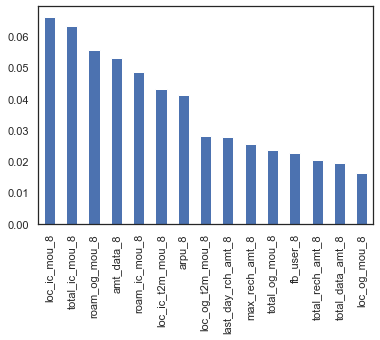

In [131]:
X = X_bal
X = pd.DataFrame(X_bal)
X.columns = df_lr.drop('churn',axis=1).columns
display(X.head())

rf1.feature_importances_.shape
importances = rf1.feature_importances_
importances.shape
weights = pd.Series(importances,index=X.columns.values)
weights.sort_values(ascending=False)[:15].plot(kind = 'bar')

### Decision Tree 

In [132]:
df_dtree = df.copy(deep=True)
df_dtree.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_amt_8,amt_data_8,avg_amt_data67,churn,month_beginning_end_8,goodmonths_arpu,goodmonths_onnet_mou,goodmonths_offnet_mou,goodmonths_roam_ic_mou,goodmonths_roam_og_mou,goodmonths_loc_og_t2t_mou,goodmonths_loc_og_t2m_mou,goodmonths_loc_og_t2f_mou,goodmonths_loc_og_t2c_mou,goodmonths_loc_og_mou,goodmonths_std_og_t2t_mou,goodmonths_std_og_t2m_mou,goodmonths_std_og_t2f_mou,goodmonths_std_og_mou,goodmonths_isd_og_mou,goodmonths_spl_og_mou,goodmonths_og_others,goodmonths_total_og_mou,goodmonths_loc_ic_t2t_mou,goodmonths_loc_ic_t2m_mou,goodmonths_loc_ic_t2f_mou,goodmonths_loc_ic_mou,goodmonths_std_ic_t2t_mou,goodmonths_std_ic_t2m_mou,goodmonths_std_ic_t2f_mou,goodmonths_std_ic_mou,goodmonths_total_ic_mou,goodmonths_spl_ic_mou,goodmonths_isd_ic_mou,goodmonths_ic_others,goodmonths_total_rech_num,goodmonths_total_rech_amt,goodmonths_max_rech_amt,goodmonths_last_day_rch_amt,goodmonths_max_rech_data,goodmonths_count_rech_2g,goodmonths_count_rech_3g,goodmonths_vol_2g_mb,goodmonths_vol_3g_mb,goodmonths_arpu_3g,goodmonths_arpu_2g,goodmonths_night_pck_user,goodmonths_monthly_2g,goodmonths_sachet_2g,goodmonths_monthly_3g,goodmonths_sachet_3g,goodmonths_fb_user,goodmonths_total_data_amt,goodmonths_amt_data,goodmonths_month_beginning_end,mon
0,7000842753,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.0,0.00,0.00,2,252,252,252,252.0,0.0,1.0,5.75,109.61,212.17,212.17,0.0,0,0,1,0,1.0,30.40,0.00,101.20,3.58,252.0,504.0,559.0,1,1,206.1005,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.00,0.000,0.000,0.00,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.5,307.0,252.0,252.0,252.0,0.0,1.0,15.725,117.165,212.170,212.17,0.0,0.0,0.0,1.0,0.0,1.0,252.0,559.0,0.0,32.266667
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0,57.74,19.38,18.74,0.00,0.0,3638.0,1185.0,1,0,1209.5150,56.26,510.295,24.86,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.37,68.000,0.090,2.25,0.0,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1185.0,0.0,26.733333
8,7001524846,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,23.0,3.0,0.0,0.03,11.94,19.83,0.00,0.0,0,3,0,0,1.0,21.03,910.65,122.16,0.00,207.0,327.0,696.0,0,0,435.4720,382.36,87.645,0.00,0.000,257.360,75.770,0.000,0.0,333.135,124.995,11.865,0.00,136.870,0.000,0.00,0.0,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.000,13.545,66.175,0.000,0.000,0.000,20.0,519.0,122.0,25.0,77.0,1.0,0.0,178.000,375.475,0.000,0.00,0.0,0.5,0.5,0.0,0.0,0.5,177.0,696.0,0.0,10.500000
21,7002124215,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,50,0.0,0.0,0.0,0.00,

In [133]:
df_dtree.drop('mobile_number', axis=1, inplace=True)

In [134]:
X=df_dtree.drop('churn', axis=1)
y=df_dtree['churn']

In [135]:
scaler_dtree=StandardScaler().fit(X)
X_dt_scaled = scaler.transform(X)

In [136]:
X_train,X_test,y_train,y_test = train_test_split(X_dt_scaled,y,train_size=0.7,random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20934, 106)
(8972, 106)
(20934,)
(8972,)


In [137]:
# taking care of imbalance via SMOTE
from imblearn.over_sampling import SMOTE
s = SMOTE(random_state=100)
X_bal,y_bal=s.fit_sample(X_train,y_train)

In [138]:
#Applying lasso regression

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lasso = LinearSVC(penalty='l1',dual=False,C=0.001).fit(X_bal,y_bal)
model = SelectFromModel(lasso,prefit=True)
X_lasso = model.transform(X_bal)

In [139]:
print(X_lasso.shape)
model.get_support(True)

(38468, 33)


array([  4,   6,   9,  12,  15,  17,  21,  26,  27,  30,  31,  33,  35,
        37,  41,  42,  46,  47,  50,  52,  54,  55,  58,  59,  68,  77,
        81,  85,  91,  97, 100, 104, 105], dtype=int64)

In [140]:
lasso_cols = df_dtree.drop('churn',axis=1).columns[model.get_support(True)]
display(lasso_cols)

Index(['roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2f_mou_8',
       'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'last_day_rch_amt_8', 'count_rech_2g_8', 'vol_2g_mb_8',
       'night_pck_user_8', 'monthly_2g_8', 'fb_user_8', 'aug_vbc_3g',
       'sep_vbc_3g', 'amt_data_8', 'month_beginning_end_8', 'goodmonths_arpu',
       'goodmonths_roam_ic_mou', 'goodmonths_roam_og_mou',
       'goodmonths_std_og_mou', 'goodmonths_std_ic_t2t_mou',
       'goodmonths_total_ic_mou', 'goodmonths_total_rech_num',
       'goodmonths_count_rech_3g', 'goodmonths_monthly_2g',
       'goodmonths_sachet_3g', 'goodmonths_month_beginning_end', 'mon'],
      dtype='object')

In [141]:
# Creating dtree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=5)
dtree.fit(X_lasso,y_bal)

DecisionTreeClassifier(max_depth=5)

In [142]:
X_test_dtree = pd.DataFrame(X_test).iloc[:,model.get_support(True)]
y_pred_dtree = dtree.predict(X_test_dtree)

In [143]:
print(confusion_matrix(y_test,y_pred_dtree))
print(accuracy_score(y_test,y_pred_dtree))
print(classification_report(y_test,y_pred_dtree))

[[7247 1007]
 [ 178  540]]
0.8679224253232278
              precision    recall  f1-score   support

           0       0.98      0.88      0.92      8254
           1       0.35      0.75      0.48       718

    accuracy                           0.87      8972
   macro avg       0.66      0.82      0.70      8972
weighted avg       0.93      0.87      0.89      8972



### Lets try to optimise the Decision tree

In [144]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

nfolds=5
parameters = {'max_depth':range(1,40)}
d_maxdepth = DecisionTreeClassifier(random_state=100)
mod_maxdepth = GridSearchCV(d_maxdepth, param_grid=parameters, n_jobs=-1,cv=nfolds, scoring="accuracy",return_train_score=True)
mod_maxdepth.fit(X_lasso,y_bal)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1, param_grid={'max_depth': range(1, 40)},
             return_train_score=True, scoring='accuracy')

In [145]:
scores = mod_maxdepth.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.141989,0.003425,0.003391,0.000487,1,{'max_depth': 1},0.780348,0.786717,0.796855,0.787599,0.787599,0.787824,0.005268,39,0.791772,0.789173,0.787743,0.791194,0.790057,0.789988,0.001439
1,0.261989,0.017252,0.001596,0.001955,2,{'max_depth': 2},0.817130,0.833507,0.830647,0.833225,0.829715,0.828845,0.006036,38,0.834633,0.831416,0.827224,0.826515,0.827392,0.829436,0.003115
2,0.322301,0.007382,0.003124,0.006248,3,{'max_depth': 3},0.833247,0.853132,0.850663,0.852853,0.850903,0.848160,0.007523,37,0.856210,0.851953,0.846721,0.846921,0.847539,0.849869,0.003703
3,0.426134,0.016492,0.000000,0.000000,4,{'max_depth': 4},0.851573,0.870159,0.876917,0.876771,0.876641,0.870412,0.009763,36,0.873887,0.869663,0.870735,0.872591,0.872559,0.871887,0.001498
4,0.485131,0.014266,0.009373,0.007653,5,{'max_depth': 5},0.855732,0.878477,0.880816,0.881841,0.881581,0.875689,0.010049,35,0.879411,0.879704,0.878534,0.877725,0.877693,0.878613,0.000833


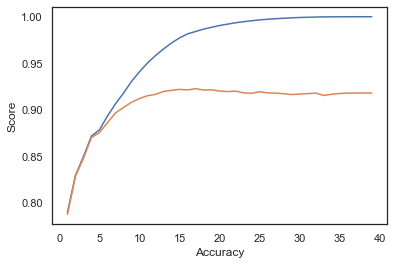

In [146]:
# Check test-train accuracy
plt.figure()
plt.plot(scores["param_max_depth"],scores["mean_train_score"],label="train score")
plt.plot(scores["param_max_depth"],scores["mean_test_score"],label="test score")
plt.xlabel("Accuracy")
plt.ylabel("Score")
plt.show()

In [147]:
mod_maxdepth.best_params_

{'max_depth': 17}

In [148]:
#Optimizing for min_samples_leaf

nfolds=5
params={'min_samples_leaf': range(5,300,20)}
dtree_minsampleaf = DecisionTreeClassifier(random_state=100)
mod_minsamplesleaf = GridSearchCV(dtree_minsampleaf,cv=nfolds,param_grid=params,return_train_score=True,n_jobs=-1,scoring='accuracy')
mod_minsamplesleaf.fit(X_lasso,y_bal)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1, param_grid={'min_samples_leaf': range(5, 300, 20)},
             return_train_score=True, scoring='accuracy')

In [149]:
scores = mod_minsamplesleaf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.336711,0.084268,0.007523,0.001805,5,{'min_samples_leaf': 5},0.876137,0.922277,0.920977,0.921227,0.916807,0.911485,0.017772,1,0.970170,0.964873,0.966335,0.964419,0.965004,0.966160,0.002104
1,2.038388,0.073535,0.006575,0.001094,25,{'min_samples_leaf': 25},0.875357,0.908760,0.912529,0.912128,0.909788,0.903713,0.014247,2,0.929583,0.924579,0.925034,0.923314,0.922340,0.924970,0.002494
2,1.907987,0.123146,0.007704,0.001856,45,{'min_samples_leaf': 45},0.871718,0.901872,0.904471,0.905628,0.905628,0.897864,0.013145,3,0.914376,0.910281,0.911516,0.910154,0.909504,0.911166,0.001732
3,1.661111,0.114935,0.007161,0.001013,65,{'min_samples_leaf': 65},0.868729,0.896673,0.897842,0.903679,0.901989,0.893782,0.012789,4,0.906772,0.903652,0.902515,0.903071,0.903656,0.903933,0.001481
4,1.692962,0.108810,0.007218,0.002099,85,{'min_samples_leaf': 85},0.869509,0.892514,0.898232,0.901209,0.899779,0.892249,0.011747,5,0.902613,0.897186,0.897641,0.898197,0.898944,0.898916,0.001939


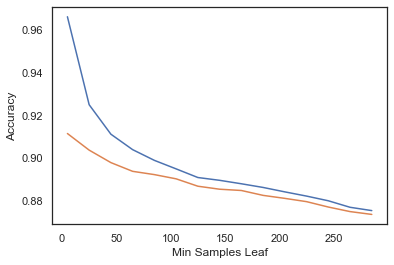

In [150]:
plt.figure()
plt.plot(scores['param_min_samples_leaf'], scores['mean_train_score'], label="training accuracy")
plt.plot(scores['param_min_samples_leaf'], scores['mean_test_score'], label="test accuracy")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Accuracy")
plt.show()

In [151]:
mod_minsamplesleaf.best_params_

{'min_samples_leaf': 5}

In [152]:
#Optimising min_samples_split
params={'min_samples_split': range(100,500,20)}
nfolds=5
dtree_splitmin = DecisionTreeClassifier(random_state=100)
mod_splitsamples = GridSearchCV(dtree_splitmin, cv=nfolds, n_jobs=-1, return_train_score=True,scoring="accuracy",param_grid=params)
mod_splitsamples.fit(X_lasso,y_bal)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1, param_grid={'min_samples_split': range(100, 500, 20)},
             return_train_score=True, scoring='accuracy')

In [153]:
scores = mod_splitsamples.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.430357,0.107819,0.006400,0.000476,100,{'min_samples_split': 100},0.868339,0.909410,0.905901,0.907838,0.909918,0.900281,0.016032,1,0.936180,0.931533,0.926269,0.925297,0.928188,0.929493,0.003964
1,2.519889,0.246140,0.009150,0.005131,120,{'min_samples_split': 120},0.865870,0.907850,0.904991,0.907578,0.908098,0.898877,0.016542,2,0.930428,0.925392,0.922662,0.921690,0.924192,0.924873,0.003053
2,2.289141,0.127688,0.006912,0.003075,140,{'min_samples_split': 140},0.867039,0.906940,0.903691,0.907968,0.906538,0.898436,0.015762,3,0.928024,0.921947,0.916423,0.918375,0.917368,0.920427,0.004234
3,2.450155,0.150248,0.005804,0.000737,160,{'min_samples_split': 160},0.868729,0.906161,0.903301,0.906928,0.905369,0.898098,0.014734,4,0.924839,0.917723,0.914473,0.915678,0.914801,0.917503,0.003839
4,2.526210,0.373697,0.011462,0.010233,180,{'min_samples_split': 180},0.871068,0.903431,0.900052,0.905758,0.903679,0.896798,0.012994,5,0.920875,0.914928,0.911549,0.912461,0.913111,0.914585,0.003334


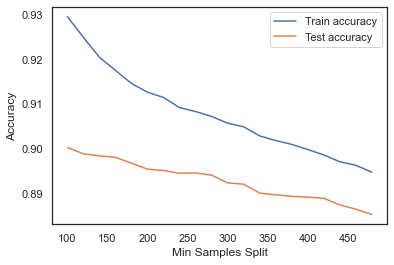

In [154]:
plt.figure()
plt.plot(scores['param_min_samples_split'],scores['mean_train_score'], label="Train accuracy")
plt.plot(scores['param_min_samples_split'],scores['mean_test_score'], label="Test accuracy")
plt.xlabel("Min Samples Split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [155]:
mod_splitsamples.best_params_

{'min_samples_split': 100}

In [156]:
params={'min_samples_split': range(5,300,20)}
nfolds=5
d3 = DecisionTreeClassifier()
ssample = GridSearchCV(d3, cv=nfolds, n_jobs=-1, return_train_score=True,scoring="accuracy",param_grid=params)
ssample.fit(X_lasso,y_bal)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'min_samples_split': range(5, 300, 20)},
             return_train_score=True, scoring='accuracy')

In [157]:
scores = mod_splitsamples.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.430357,0.107819,0.006400,0.000476,100,{'min_samples_split': 100},0.868339,0.909410,0.905901,0.907838,0.909918,0.900281,0.016032,1,0.936180,0.931533,0.926269,0.925297,0.928188,0.929493,0.003964
1,2.519889,0.246140,0.009150,0.005131,120,{'min_samples_split': 120},0.865870,0.907850,0.904991,0.907578,0.908098,0.898877,0.016542,2,0.930428,0.925392,0.922662,0.921690,0.924192,0.924873,0.003053
2,2.289141,0.127688,0.006912,0.003075,140,{'min_samples_split': 140},0.867039,0.906940,0.903691,0.907968,0.906538,0.898436,0.015762,3,0.928024,0.921947,0.916423,0.918375,0.917368,0.920427,0.004234
3,2.450155,0.150248,0.005804,0.000737,160,{'min_samples_split': 160},0.868729,0.906161,0.903301,0.906928,0.905369,0.898098,0.014734,4,0.924839,0.917723,0.914473,0.915678,0.914801,0.917503,0.003839
4,2.526210,0.373697,0.011462,0.010233,180,{'min_samples_split': 180},0.871068,0.903431,0.900052,0.905758,0.903679,0.896798,0.012994,5,0.920875,0.914928,0.911549,0.912461,0.913111,0.914585,0.003334


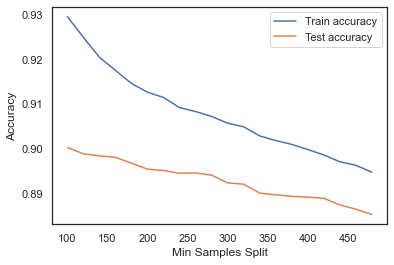

In [158]:
plt.figure()
plt.plot(scores['param_min_samples_split'],scores['mean_train_score'], label="Train accuracy")
plt.plot(scores['param_min_samples_split'],scores['mean_test_score'], label="Test accuracy")
plt.xlabel("Min Samples Split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [159]:
ssample.best_params_

{'min_samples_split': 5}

In [160]:
#Optmising all values together to get a grid
nfolds=5
params_grid = {'max_depth':range(5,20,5),
              'min_samples_leaf': range(25,200,50),
              'min_samples_split': range(25,200,50),
              'criterion':['gini','entropy']}
dtree_grid = DecisionTreeClassifier()
grid_model = GridSearchCV(dtree_grid,cv=nfolds,param_grid=params_grid, n_jobs=-1)
grid_model.fit(X_lasso,y_bal)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 20, 5),
                         'min_samples_leaf': range(25, 200, 50),
                         'min_samples_split': range(25, 200, 50)})

In [161]:
scores = pd.DataFrame(grid_model.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.916863,0.050718,0.004987,0.000892,gini,5,25,25,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.855212,0.878997,0.880946,0.881971,0.881711,0.875767,0.010330,65
1,0.867966,0.016919,0.012649,0.015456,gini,5,25,75,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.855212,0.878997,0.880946,0.881971,0.881711,0.875767,0.010330,65
2,0.992778,0.074025,0.004777,0.000743,gini,5,25,125,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.855212,0.878737,0.880946,0.882231,0.881191,0.875663,0.010289,68
3,0.987319,0.055345,0.011210,0.010463,gini,5,25,175,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.855602,0.878737,0.880946,0.882231,0.881191,0.875741,0.010134,67
4,0.860836,0.024520,0.004968,0.001093,gini,5,75,25,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.854692,0.878087,0.879906,0.881061,0.880541,0.874857,0.010133,69


In [162]:
print(grid_model.best_estimator_)
print(grid_model.best_params_)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=25, min_samples_split=25)
{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 25, 'min_samples_split': 25}


In [163]:
# Optimal Dtree 
dtree_optimal = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
dtree_optimal.fit(X_lasso,y_bal)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=25,
                       min_samples_split=25)

In [164]:
dtree_optimal.score(X_test_dtree,y_test)

0.8855327686134641

In [165]:
y_pred = dtree_optimal.predict(X_test_dtree)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8855327686134641
              precision    recall  f1-score   support

           0       0.97      0.90      0.94      8254
           1       0.38      0.72      0.50       718

    accuracy                           0.89      8972
   macro avg       0.68      0.81      0.72      8972
weighted avg       0.93      0.89      0.90      8972

[[7428  826]
 [ 201  517]]


,roam_og_mou_8,loc_og_t2m_mou_8,loc_og_mou_8,std_og_t2f_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,total_rech_num_8,total_rech_amt_8,last_day_rch_amt_8,count_rech_2g_8,vol_2g_mb_8,night_pck_user_8,monthly_2g_8,fb_user_8,aug_vbc_3g,sep_vbc_3g,amt_data_8,month_beginning_end_8,goodmonths_arpu,goodmonths_roam_ic_mou,goodmonths_roam_og_mou,goodmonths_std_og_mou,goodmonths_std_ic_t2t_mou,goodmonths_total_ic_mou,goodmonths_total_rech_num,goodmonths_count_rech_3g,goodmonths_monthly_2g,goodmonths_sachet_3g,goodmonths_month_beginning_end,mon
0,-0.176463,-0.446998,-0.482600,-0.037324,-0.322847,-0.648496,-0.584910,-0.587778,-0.240051,-1.075908,-0.956539,-0.636398,-0.476380,-0.338235,-0.107396,-0.377672,-0.955833,-0.402063,-0.153472,-0.580767,-0.219780,-0.246512,0.209949,-0.079068,-0.536864,0.025383,-0.582458,-0.960319,-0.395913,-0.461235,-0.230575,-0.247868,0.319575
1,-0.189908,2.996780,2.136418,-0.145104,0.173672,1.657556,0.764935,1.021365,-0.240051,-0.105885,0.979003,-0.636398,-0.476380,-0.338235,-0.107396,-0.377672,-0.955833,-0.402063,-0.153472,0.074554,-0.219780,0.299443,-0.217703,-0.250612,0.137564,2.025555,1.058716,-0.844559,-0.395913,-0.461235,-0.230575,-0.247868,0.827239
2,-0.189908,0.682840,0.668844,-0.145104,-0.020404,-0.056415,0.597326,0.533989,-0.240051,0.001896,0.344721,0.258197,-0.082718,-0.332200,-0.107396,-0.377672,1.046208,-0.312430,-0.153472,-0.085955,-0.219780,0.365743,-0.217703,-0.250612,-0.577398,-0.196459,0.819653,0.023639,0.051173,-0.461235,-0.230575,-0.247868,-0.777229
3,3.583357,-0.325684,0.731801,-0.145104,5.005859,3.483613,0.825751,0.592518,-0.240051,0.971919,2.312958,-0.106523,-0.476380,-0.338235,-0.107396,-0.377672,-0.955833,-0.402063,-0.153472,0.526194,-0.219780,1.168049,0.791160,2.331431,1.508469,-0.155816,0.503735,0.718197,-0.395913,-0.461235,-0.230575,-0.247868,-0.545334
4,-0.189908,-0.585459,-0.543770,-0.145104,-0.193299,-0.303105,-0.511523,-0.531489,-0.240051,-0.752567,-0.482462,-0.429953,-0.476380,-0.338235,-0.107396,-0.377672,-0.955833,-0.402063,-0.153472,-0.420257,4.549996,0.170035,-0.217703,-0.250612,0.918031,-0.138787,-0.438753,0.255158,-0.395913,-0.461235,-0.230575,-0.247868,-0.966297


<AxesSubplot:>

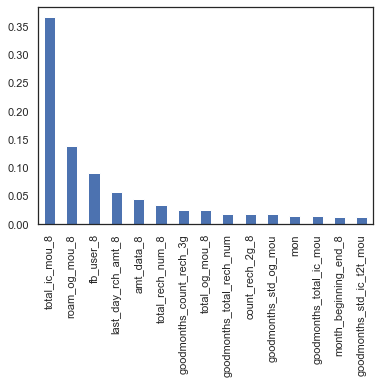

In [166]:
F = X_lasso
F = pd.DataFrame(X_lasso)
F.columns = lasso_cols
display(F.head())


weights = pd.Series(dtree_optimal.feature_importances_,index=F.columns.values)
weights.sort_values(ascending=False)[:15].plot(kind='bar')

### Random Forest

In [167]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_lasso,y_bal)

RandomForestClassifier()

In [168]:
y_pred = rf.predict(X_test_dtree)

In [169]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9290013374944271
[[7859  395]
 [ 242  476]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      8254
           1       0.55      0.66      0.60       718

    accuracy                           0.93      8972
   macro avg       0.76      0.81      0.78      8972
weighted avg       0.94      0.93      0.93      8972



In [170]:
##Tuning hyperparams of RandomForest

##Tuning max_depth
n_folds=5
params = {'max_depth':range(2,20,5)}
rf_md = RandomForestClassifier()
max_depth_rfmodel = GridSearchCV(rf_md,cv=n_folds,scoring="accuracy",param_grid=params,n_jobs=-1,return_train_score=True)
max_depth_rfmodel.fit(X_lasso,y_bal)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [171]:
score = max_depth_rfmodel.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.271764,0.262557,0.156546,0.006469,2,{'max_depth': 2},0.807122,0.823499,0.829218,0.820356,0.821006,0.820240,0.007265,4,0.822837,0.826477,0.819945,0.818619,0.822161,0.822008,0.002699
1,13.929368,0.876418,0.233971,0.037812,7,{'max_depth': 7},0.882376,0.907330,0.909150,0.908228,0.909138,0.903245,0.010456,3,0.915221,0.910346,0.909794,0.910122,0.908595,0.910816,0.002284
2,18.149825,0.694840,0.248551,0.006352,12,{'max_depth': 12},0.920587,0.945282,0.947881,0.946965,0.948395,0.941822,0.010670,2,0.968870,0.966270,0.965360,0.964842,0.965134,0.966095,0.001467
3,18.586479,1.329370,0.242411,0.021771,17,{'max_depth': 17},0.935534,0.958539,0.958019,0.960354,0.961393,0.954768,0.009694,1,0.988237,0.988172,0.989374,0.987587,0.988497,0.988373,0.000582


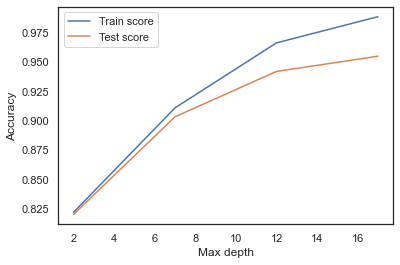

In [172]:
plt.figure()
plt.plot(score['param_max_depth'],score['mean_train_score'],label="Train score")
plt.plot(score['param_max_depth'],score['mean_test_score'],label="Test score")
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [173]:
max_depth_rfmodel.best_params_

{'max_depth': 17}

In [174]:
# Checking for min_samples_split
n_folds=5
params={'min_samples_split':range(100,500,50)}
rf_samplessplit=RandomForestClassifier()
samples_split_rfmod = GridSearchCV(rf_samplessplit,cv=n_folds,param_grid=params,scoring="accuracy",return_train_score=True,n_jobs=-1)
samples_split_rfmod.fit(X_lasso,y_bal)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'min_samples_split': range(100, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [175]:
score = samples_split_rfmod.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,21.849099,0.548795,0.328112,0.044655,100,{'min_samples_split': 100},0.895373,0.925656,0.927476,0.930976,0.928376,0.921572,0.013211,1,0.940989,0.934328,0.935692,0.935045,0.934395,0.936090,0.002499
1,22.544259,0.577216,0.366326,0.032237,150,{'min_samples_split': 150},0.890694,0.918248,0.917728,0.922527,0.922137,0.914267,0.011947,2,0.931338,0.923409,0.923052,0.924159,0.924224,0.925237,0.003083
2,21.200135,0.734596,0.272060,0.020573,200,{'min_samples_split': 200},0.885105,0.912399,0.914479,0.918367,0.916807,0.909432,0.012331,3,0.923604,0.916520,0.916195,0.917011,0.915776,0.917821,0.002920
3,19.807699,0.597236,0.253579,0.051974,250,{'min_samples_split': 250},0.885625,0.904731,0.911619,0.912388,0.914208,0.905714,0.010546,4,0.919640,0.911256,0.912491,0.911519,0.912299,0.913441,0.003134
4,19.674575,0.612362,0.264271,0.030230,300,{'min_samples_split': 300},0.879257,0.903041,0.909410,0.908358,0.912258,0.902465,0.011982,5,0.913076,0.906804,0.909437,0.906970,0.908205,0.908898,0.002295


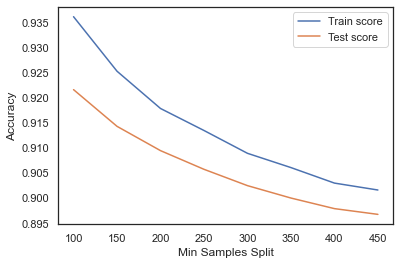

In [176]:
plt.figure()
plt.plot(score['param_min_samples_split'],score['mean_train_score'],label="Train score")
plt.plot(score['param_min_samples_split'],score['mean_test_score'],label="Test score")
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [177]:
samples_split_rfmod.best_params_

{'min_samples_split': 100}

In [178]:
#Trying for param grid at once since the results from individual optimizations may not be correct
n_folds=5
params_grid={
     'max_depth': range(2,20,5),
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200), 
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}

rf_grid = RandomForestClassifier()
grid_rf_model = GridSearchCV(rf_grid,cv=n_folds,param_grid=params_grid,scoring="accuracy",n_jobs=-1, verbose=1)
grid_rf_model.fit(X_lasso,y_bal)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 46.7min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 5), 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [179]:
print(grid_rf_model.best_params_)
print(grid_rf_model.best_estimator_)
print(grid_rf_model.best_score_)

{'max_depth': 12, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}
RandomForestClassifier(max_depth=12, max_features=10, min_samples_leaf=100,
                       min_samples_split=200)
0.8954198502171197


In [180]:
## Running RF with optimal estimators
rf_opt = RandomForestClassifier(max_depth=17,max_features=10,min_samples_leaf=100,min_samples_split=200,n_estimators=100)
rf_opt.fit(X_lasso,y_bal)

RandomForestClassifier(max_depth=17, max_features=10, min_samples_leaf=100,
                       min_samples_split=200)

In [181]:
y_pred = rf_opt.predict(X_test_dtree)

In [182]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8943379402585823
[[7476  778]
 [ 170  548]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      8254
           1       0.41      0.76      0.54       718

    accuracy                           0.89      8972
   macro avg       0.70      0.83      0.74      8972
weighted avg       0.93      0.89      0.91      8972



In [183]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred))

0.8344869339960435


In [184]:
from sklearn.metrics import roc_curve
proba = rf_opt.predict_proba(X_test_dtree)
preds = proba[:,1]

In [185]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

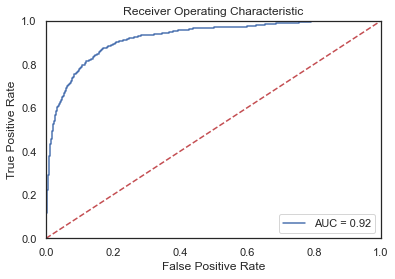

In [186]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [187]:
print(confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

[[7476  778]
 [ 170  548]]
7476 778 170 548


,roam_og_mou_8,loc_og_t2m_mou_8,loc_og_mou_8,std_og_t2f_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,total_rech_num_8,total_rech_amt_8,last_day_rch_amt_8,count_rech_2g_8,vol_2g_mb_8,night_pck_user_8,monthly_2g_8,fb_user_8,aug_vbc_3g,sep_vbc_3g,amt_data_8,month_beginning_end_8,goodmonths_arpu,goodmonths_roam_ic_mou,goodmonths_roam_og_mou,goodmonths_std_og_mou,goodmonths_std_ic_t2t_mou,goodmonths_total_ic_mou,goodmonths_total_rech_num,goodmonths_count_rech_3g,goodmonths_monthly_2g,goodmonths_sachet_3g,goodmonths_month_beginning_end,mon
0,-0.176463,-0.446998,-0.482600,-0.037324,-0.322847,-0.648496,-0.584910,-0.587778,-0.240051,-1.075908,-0.956539,-0.636398,-0.476380,-0.338235,-0.107396,-0.377672,-0.955833,-0.402063,-0.153472,-0.580767,-0.219780,-0.246512,0.209949,-0.079068,-0.536864,0.025383,-0.582458,-0.960319,-0.395913,-0.461235,-0.230575,-0.247868,0.319575
1,-0.189908,2.996780,2.136418,-0.145104,0.173672,1.657556,0.764935,1.021365,-0.240051,-0.105885,0.979003,-0.636398,-0.476380,-0.338235,-0.107396,-0.377672,-0.955833,-0.402063,-0.153472,0.074554,-0.219780,0.299443,-0.217703,-0.250612,0.137564,2.025555,1.058716,-0.844559,-0.395913,-0.461235,-0.230575,-0.247868,0.827239
2,-0.189908,0.682840,0.668844,-0.145104,-0.020404,-0.056415,0.597326,0.533989,-0.240051,0.001896,0.344721,0.258197,-0.082718,-0.332200,-0.107396,-0.377672,1.046208,-0.312430,-0.153472,-0.085955,-0.219780,0.365743,-0.217703,-0.250612,-0.577398,-0.196459,0.819653,0.023639,0.051173,-0.461235,-0.230575,-0.247868,-0.777229
3,3.583357,-0.325684,0.731801,-0.145104,5.005859,3.483613,0.825751,0.592518,-0.240051,0.971919,2.312958,-0.106523,-0.476380,-0.338235,-0.107396,-0.377672,-0.955833,-0.402063,-0.153472,0.526194,-0.219780,1.168049,0.791160,2.331431,1.508469,-0.155816,0.503735,0.718197,-0.395913,-0.461235,-0.230575,-0.247868,-0.545334
4,-0.189908,-0.585459,-0.543770,-0.145104,-0.193299,-0.303105,-0.511523,-0.531489,-0.240051,-0.752567,-0.482462,-0.429953,-0.476380,-0.338235,-0.107396,-0.377672,-0.955833,-0.402063,-0.153472,-0.420257,4.549996,0.170035,-0.217703,-0.250612,0.918031,-0.138787,-0.438753,0.255158,-0.395913,-0.461235,-0.230575,-0.247868,-0.966297


<AxesSubplot:>

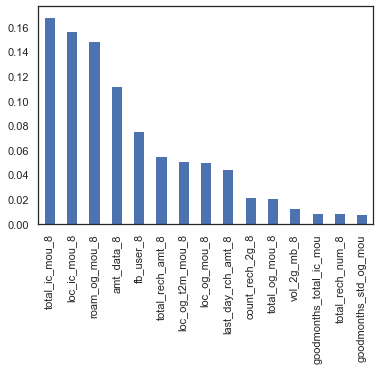

In [188]:
X = X_lasso
X = pd.DataFrame(X_lasso)
X.columns = lasso_cols
display(X.head())
importances = rf_opt.feature_importances_
importances.shape
#print(importances)
weights = pd.Series(importances,index=X.columns.values)
# print(weights.sort_values()[-10:])
# weights.sort_values()[-10:].plot(kind = 'barh')
weights.sort_values(ascending=False)[:15].plot(kind = 'bar')

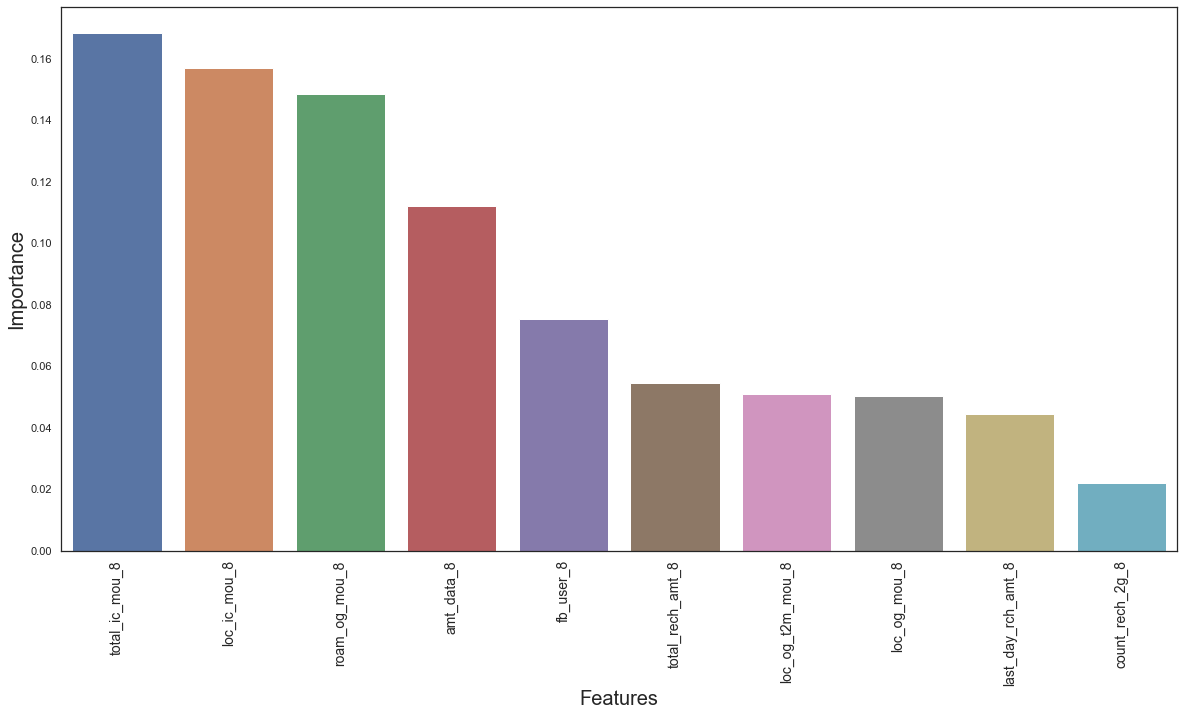

In [189]:
testing = pd.DataFrame(weights).reset_index()
testing.columns=['Feature','Importance']
testing.sort_values(by='Importance',ascending=False,inplace=True)

plt.figure(figsize=(20, 10))
sns.barplot(x='Feature', y='Importance', data=testing.head(10))
plt.xlabel('Features', size=20)
plt.ylabel('Importance', size=20)
plt.xticks(size = 14, rotation='vertical')
plt.show()

## Observation and conclusion

#### From above EDA and modelling, we can conclude following
1. Customers with life of more that 5 years with telecom operator are less likely to churn
2. Customers with life less than 3 years are more likely to churn
3. Based on Lasso regularization it is observed that minutes of usage(voice calls) and recharge done on recharge done on 8th month(August) affects the most on churn rate. Whereas Mobile internet usage volume for 3g service affects the least.
4. Operaqtor can focus on customers whose number of recharge and recharge amount keeps drcreasing from 6th to 8th month of service usage.
5. Roaming incoming call plays a good role, improvement on roaming services should be considered